<br><br>

<font color=#191347 ><font>
<p style = "font-family:times;">
    <font size="7">
        Interactive Learning 
    </font>    
</p>

<br>
    
<font color=#ed1c24><font>
<p style = "font-family:optima;">
    <font size="6">
        Homework #1
    </font>    
<font color=#000000> <font>
</p>

> $\textit{Mohammad Saadati - 810198410}$

### Import Libraries
First of all, we import necessary libraries to use their functions.

In [1]:
from BP_reward import get_reward
import random
import matplotlib.pyplot as plt
import numpy as np

STUDENT_ID = 810198410
P_SW = 0.8
P_SL = 0.7

# Question 2

In [29]:
def draw_reward_trial_plot(rewards, doctor_name, _color):
    plt.figure(figsize=(8,6))
    plt.plot(range(1,101), rewards, label="reward", color = _color)
    plt.ylabel('sum of rewrads')
    plt.xlabel('trial')
    plt.title('Sum of rewards for Doctor '+ doctor_name + ' approach')
    plt.legend()
    plt.grid()
    plt.show()

In [30]:
def draw_reward_trial_plot_together(rewards, colors):   
    plt.figure(figsize=(8,6))
    plt.plot(range(1,101), rewards[0], label="Doctor A", color = colors[0])
    plt.plot(range(1,101), rewards[1], label="Doctor B", color = colors[1])
    plt.plot(range(1,101), rewards[2], label="Doctor C", color = colors[2])
    plt.ylabel('sum of rewrads')
    plt.xlabel('trial')
    plt.title('Sum of rewards for Doctor A, B, C approach')
    plt.legend()
    plt.grid()
    plt.show()

## Doctor A

In [55]:
def doctor_a_single_action(previous_action):
    another_action = 2 if previous_action == 1 else 1  
    reward = get_reward(previous_action, STUDENT_ID)
    next_action = None
    
    if reward > 0:
        if random.random() < P_SW:
            next_action = previous_action
        else:
            next_action = another_action
    else:
        if random.random() > P_SL:
            next_action = previous_action
        else:
            next_action = another_action
            
    return next_action, reward

In [56]:
def doctor_a_approach():
    all_rewards = []
    sum_rewards = 0

    action = random.randint(1, 2)
    for i in range(100):
        action, reward = doctor_a_single_action(action)
        sum_rewards += reward
        all_rewards.append(sum_rewards)
        
    return all_rewards

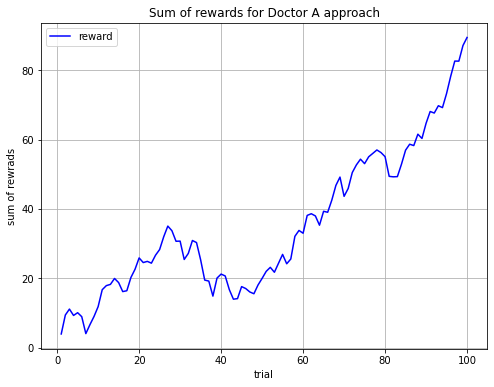

In [19]:
all_rewards_a = doctor_a_approach()

draw_reward_trial_plot(all_rewards_a, "A", 'b')

# Doctor B

In [20]:
def doctor_b_single_action():
    action = random.randint(1, 2) 
    reward = get_reward(action, STUDENT_ID)
    return reward

In [21]:
def doctor_b_approach():
    all_rewards = []
    sum_rewards = 0

    for i in range(100):
        reward = doctor_b_single_action()
        sum_rewards += reward
        all_rewards.append(sum_rewards)
        
    return all_rewards

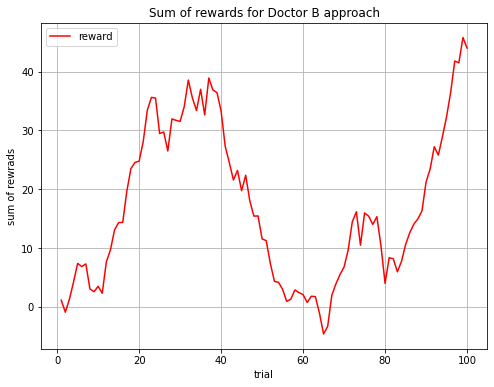

In [22]:
all_rewards_b = doctor_b_approach()

draw_reward_trial_plot(all_rewards_b, "B", 'r')

# Doctor C

In [23]:
def doctor_c_approach():
    all_rewards = []
    sum_rewards = 0

    for i in range(10):
        reward = get_reward(1, STUDENT_ID)
        sum_rewards += reward
        all_rewards.append(sum_rewards)

    for i in range(10):
        reward = get_reward(2, STUDENT_ID)
        sum_rewards += reward
        all_rewards.append(sum_rewards)

    best_action = 1 if all_rewards[9] > (all_rewards[19] - all_rewards[9]) else 2

    for i in range(8):
        for j in range(7):
            reward = get_reward(best_action, STUDENT_ID)
            sum_rewards += reward
            all_rewards.append(sum_rewards)
        for j in range(3):
            action = random.randint(1, 2)
            reward = get_reward(action, STUDENT_ID)
            sum_rewards += reward
            all_rewards.append(sum_rewards)
    
    return all_rewards

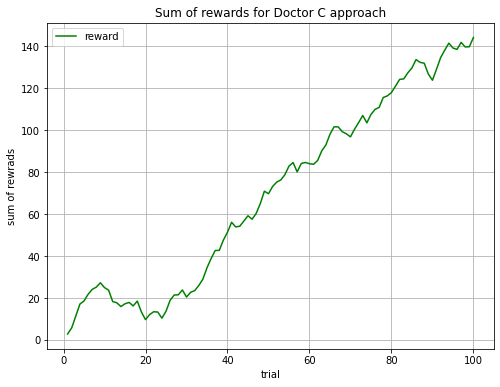

In [24]:
all_rewards_c = doctor_c_approach()

draw_reward_trial_plot(all_rewards_c, "C", 'g')

## Doctor A, B, C

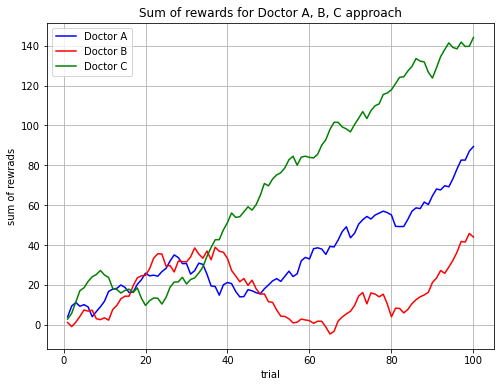

In [31]:
draw_reward_trial_plot_together([all_rewards_a, all_rewards_b, all_rewards_c], ["b", "r", "g"])

# Question 3

In [38]:
def draw_confidence_interval(all_rewards, doctor_name):
    lower_bound = np.percentile(all_rewards, 2.5)
    upper_bound  = np.percentile(all_rewards, 97.5)
    print('Lower bound:',lower_bound)
    print('Upper bound: ',upper_bound)

    all_rewards = np.array(all_rewards)

    plt.figure(figsize=(8,6))
    plt.hist(all_rewards[all_rewards<lower_bound], color='r', label="Outside the confidence interval")
    plt.hist(all_rewards[(all_rewards>=lower_bound)&(all_rewards<=upper_bound)], color='g', label="Inside the confidence interval")
    plt.hist(all_rewards[all_rewards>upper_bound], color='r')
    plt.title("95% confidence interval on the rewards of doctor " + doctor_name +" approach")
    plt.xlabel("reward")
    plt.ylabel("frequency")
    plt.legend()
    plt.grid()
    plt.show()

In [52]:
def repeat_run_of_Q2(number_of_runs):
    for i in range(number_of_runs):
        print("###################################### Run number {} ###########################################".format(i+1))
    
        all_rewards_a = doctor_a_approach()
        draw_reward_trial_plot(all_rewards_a, "A", 'b')
        draw_confidence_interval(all_rewards_a, "A")

        print("======================================================================")

        all_rewards_b = doctor_c_approach()
        draw_reward_trial_plot(all_rewards_b, "B", 'r')
        draw_confidence_interval(all_rewards_b, "B")

        print("======================================================================")

        all_rewards_c = doctor_b_approach()
        draw_reward_trial_plot(all_rewards_c, "C", 'g')
        draw_confidence_interval(all_rewards_c, "C")

        print("======================================================================")

        draw_reward_trial_plot_together([all_rewards_a, all_rewards_b, all_rewards_c], ["b", "r", "g"])   

## Run 5 times

###################################### Run number 1 ###########################################


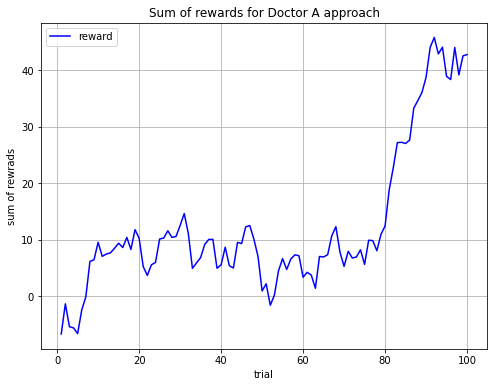

Lower bound: -5.471319742908036
Upper bound:  44.07235208455972


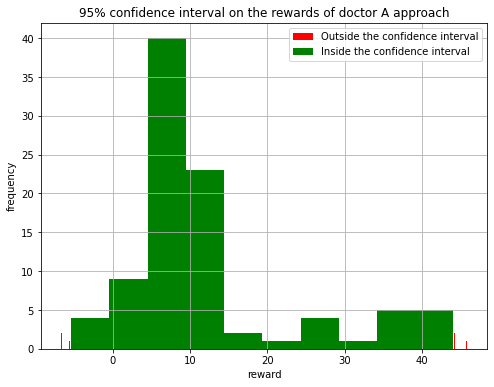

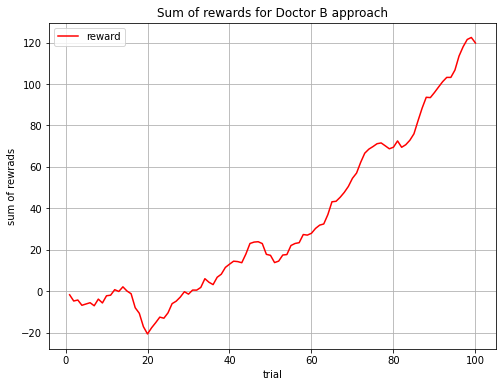

Lower bound: -16.2296456024086
Upper bound:  118.99014818843746


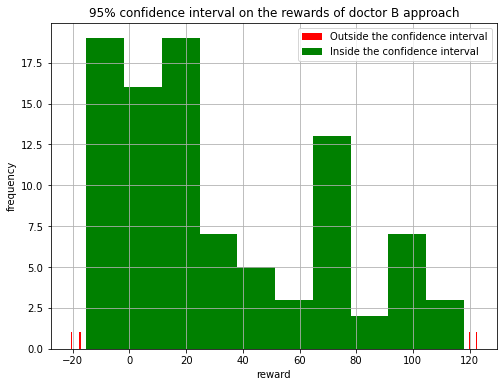

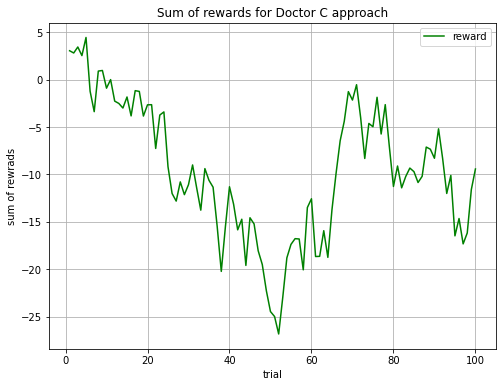

Lower bound: -23.74925891029067
Upper bound:  2.9368840157798366


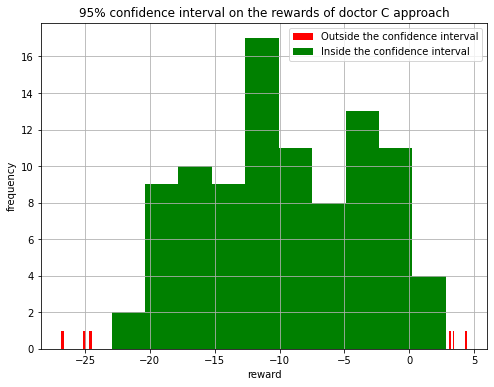

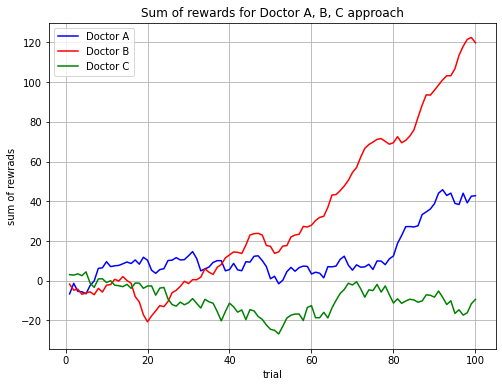

###################################### Run number 2 ###########################################


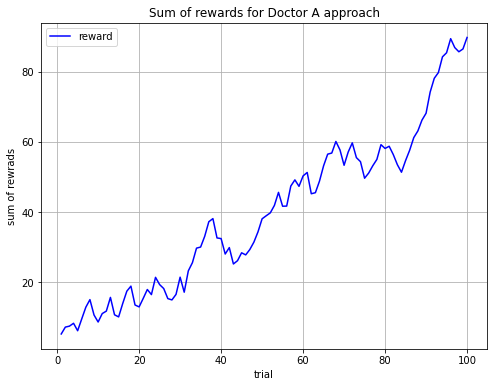

Lower bound: 7.257704465786914
Upper bound:  86.74551740501546


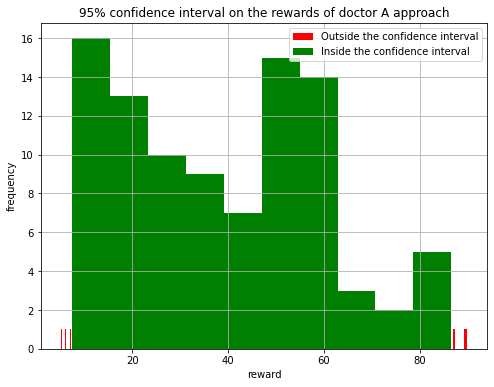

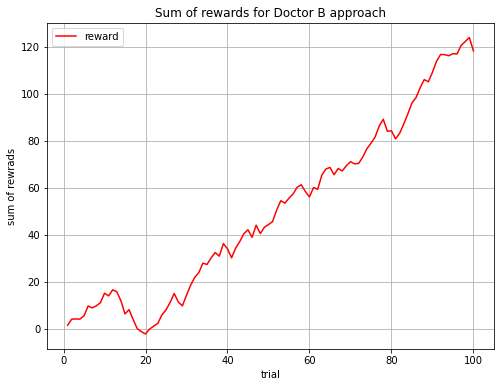

Lower bound: -0.1283292472631855
Upper bound:  119.42978191530028


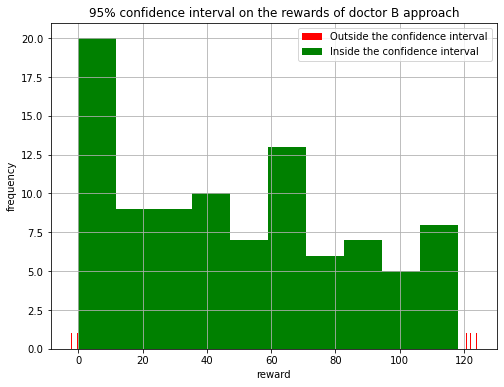

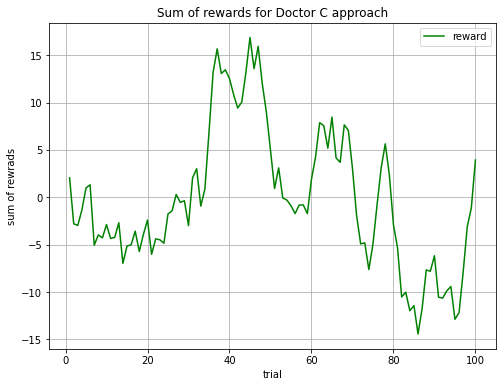

Lower bound: -12.079981987343606
Upper bound:  14.671506781495676


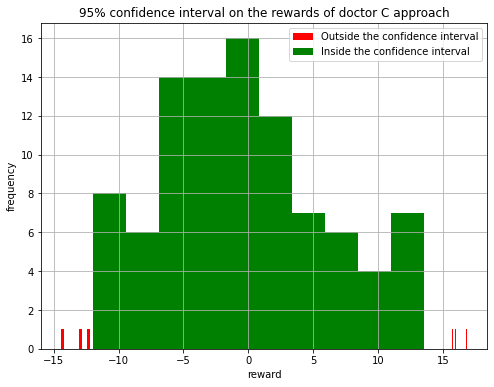

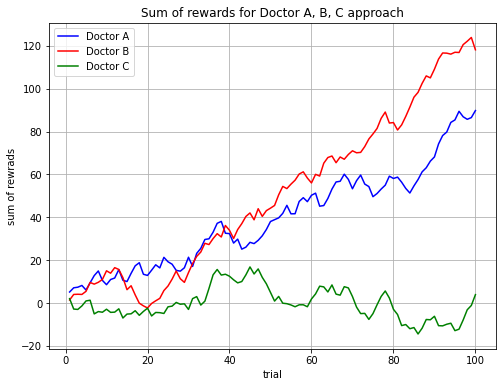

###################################### Run number 3 ###########################################


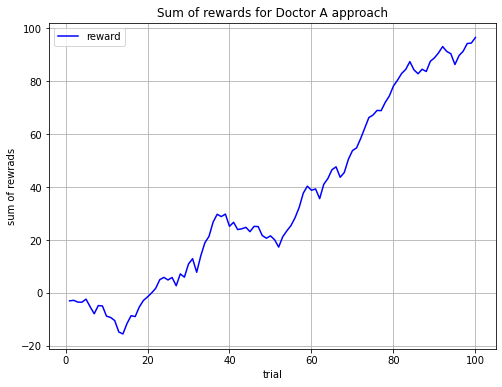

Lower bound: -11.015588757906311
Upper bound:  93.58671728081374


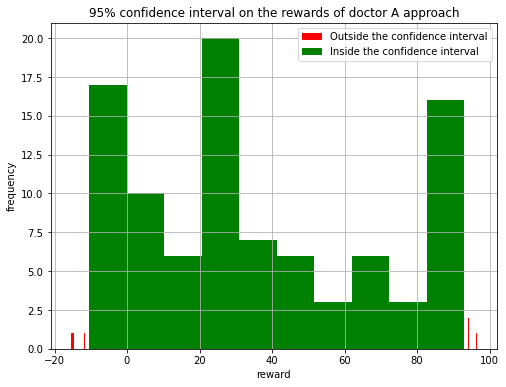

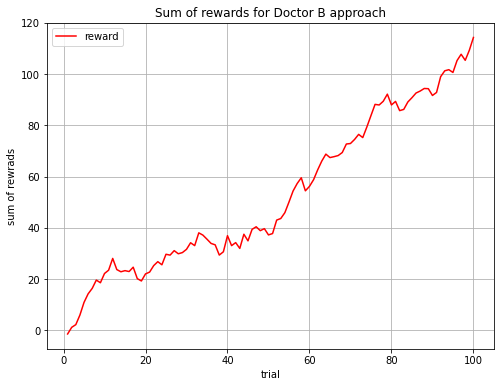

Lower bound: 4.044703252806597
Upper bound:  106.59534643659181


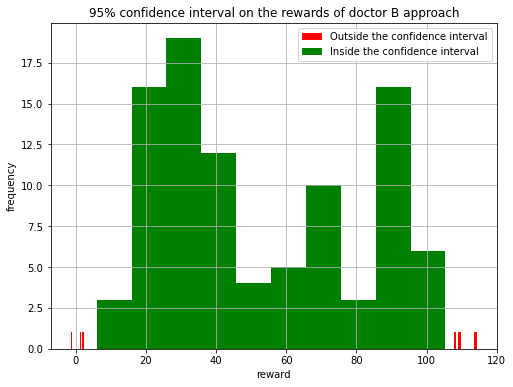

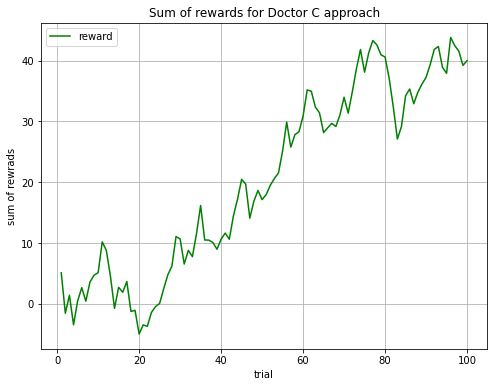

Lower bound: -3.4640936217158886
Upper bound:  42.525605088108165


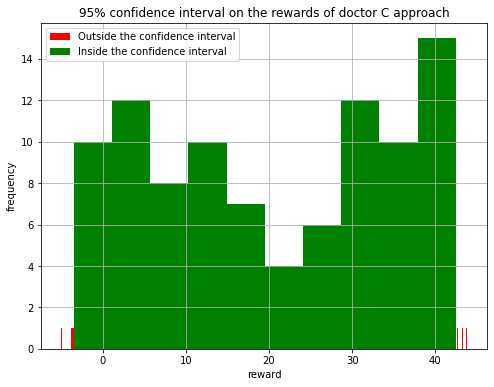

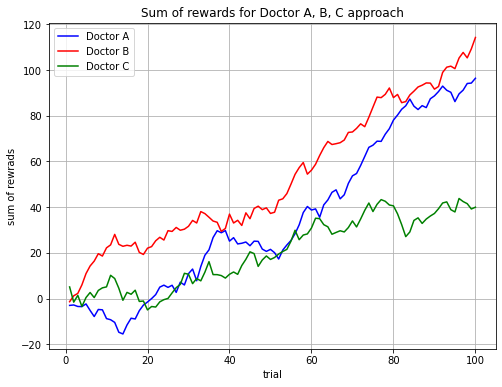

###################################### Run number 4 ###########################################


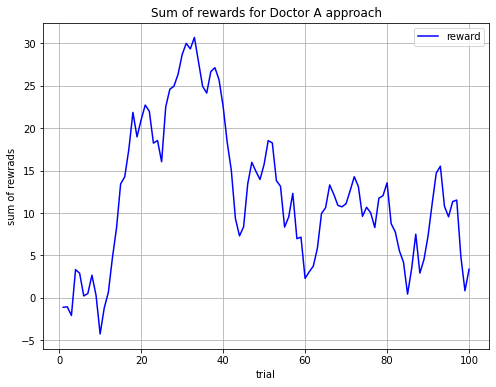

Lower bound: -1.1619029647451744
Upper bound:  29.01970740003719


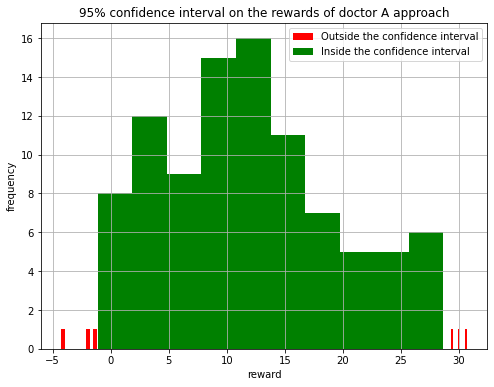

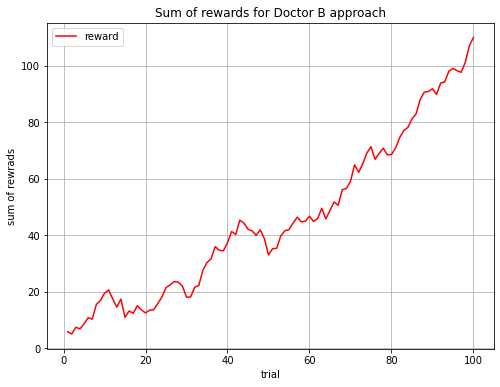

Lower bound: 7.094831785134543
Upper bound:  100.1197207112412


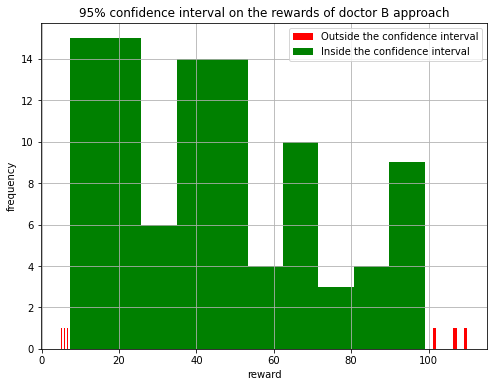

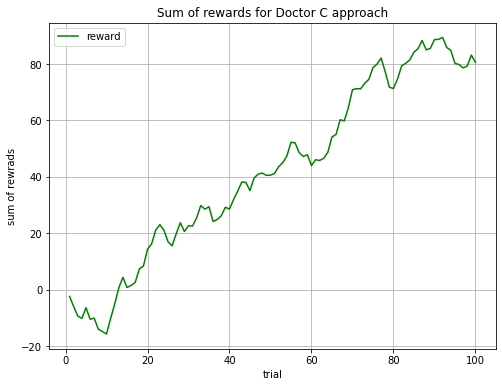

Lower bound: -12.312881945989403
Upper bound:  88.46986961214732


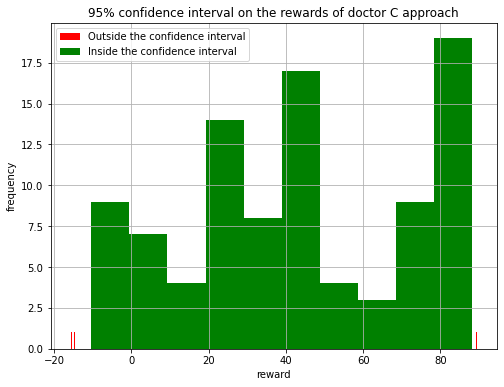

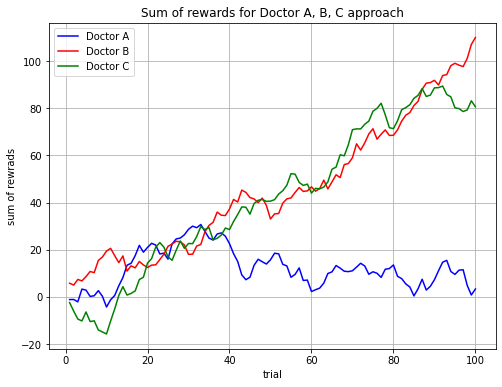

###################################### Run number 5 ###########################################


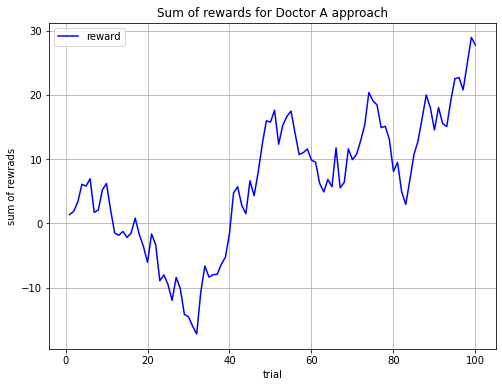

Lower bound: -14.339124400147725
Upper bound:  23.834064197710887


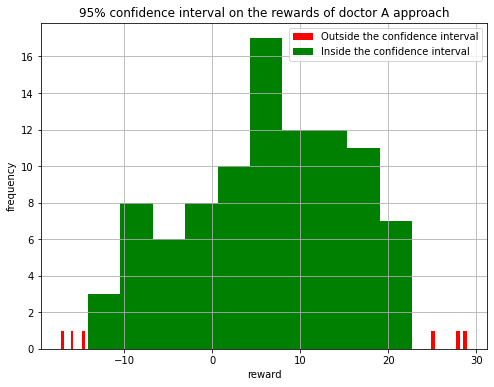

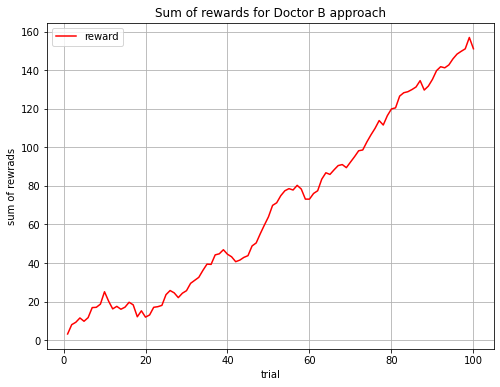

Lower bound: 9.488946669356254
Upper bound:  150.4141180491168


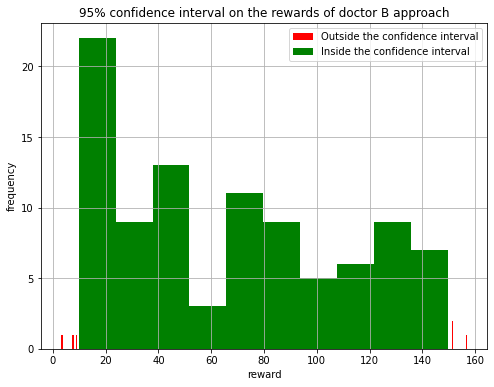

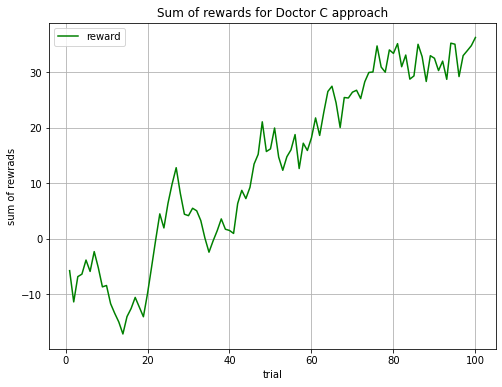

Lower bound: -14.037684131438175
Upper bound:  35.06600273513104


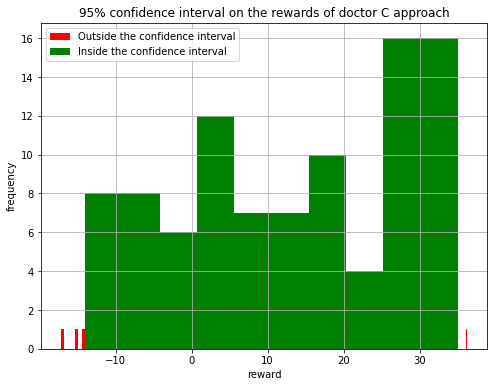

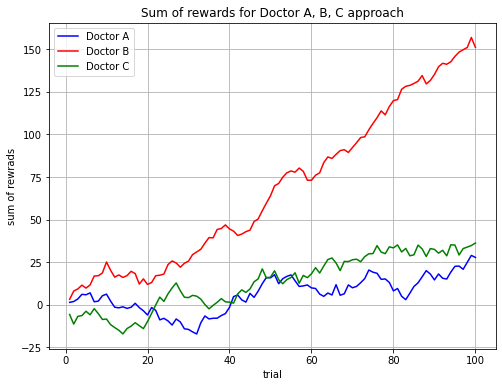

In [53]:
repeat_run_of_Q2(5)

## Run 20 times

###################################### Run number 1 ###########################################


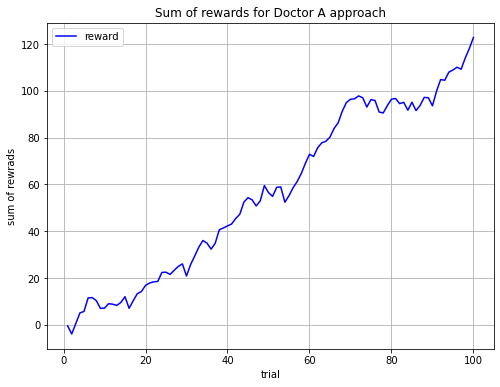

Lower bound: 2.739604422609754
Upper bound:  112.18154246160401


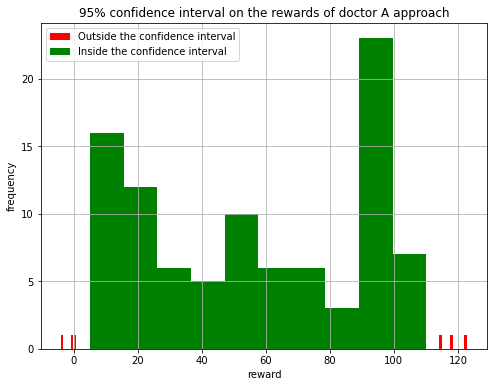

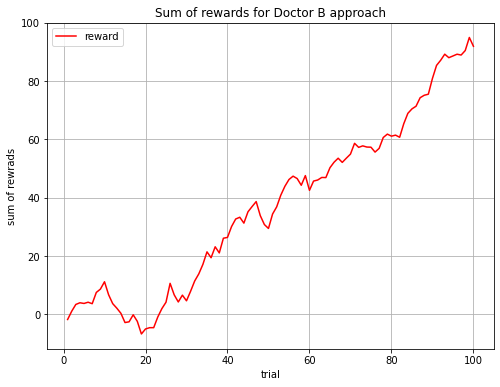

Lower bound: -4.585268309933069
Upper bound:  89.8822647798035


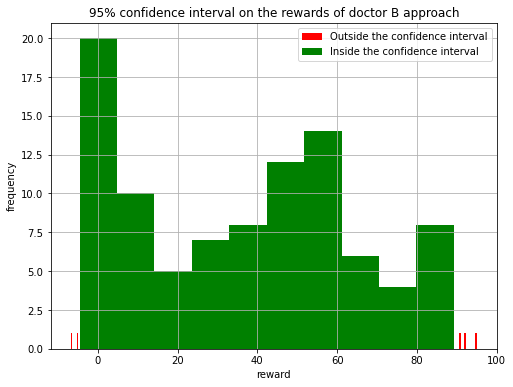

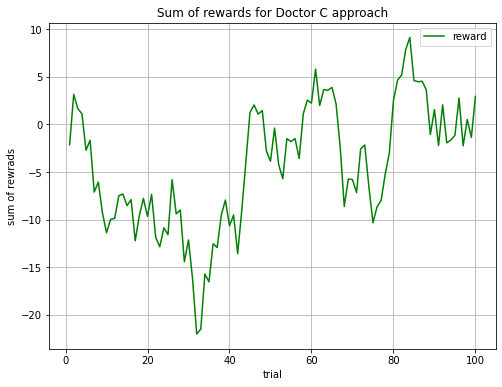

Lower bound: -16.406366758681077
Upper bound:  5.527519858328582


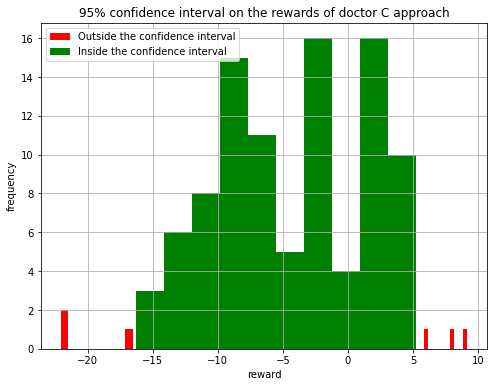

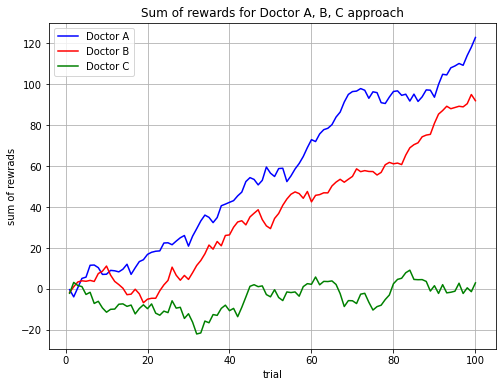

###################################### Run number 2 ###########################################


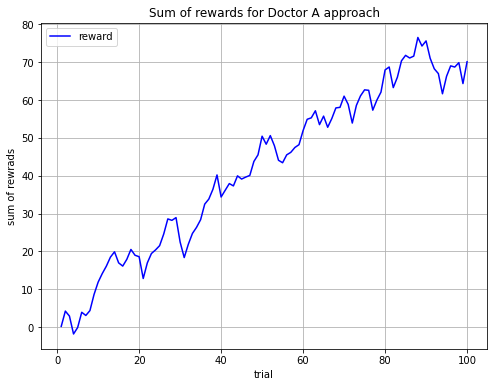

Lower bound: 1.5069681947207894
Upper bound:  73.07079150877973


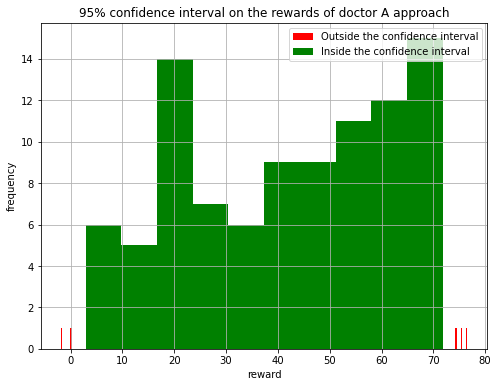

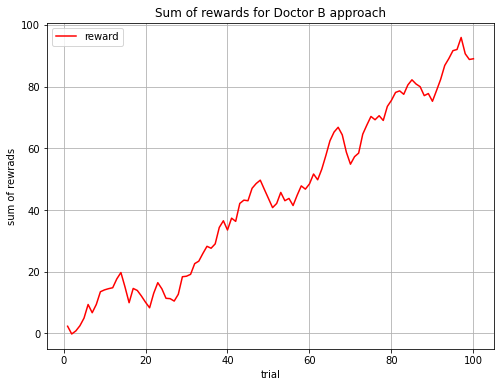

Lower bound: 2.42549997017581
Upper bound:  91.16506196350109


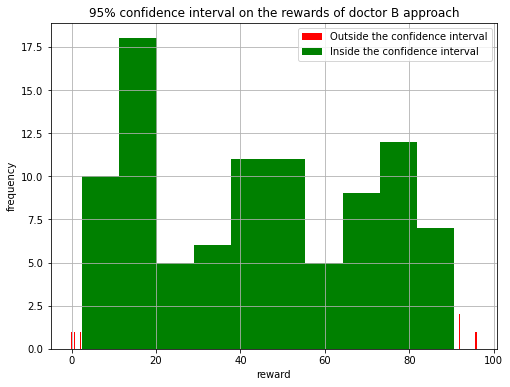

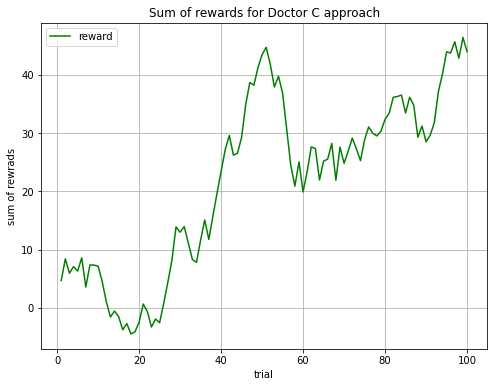

Lower bound: -3.5370949584436655
Upper bound:  44.370981571310594


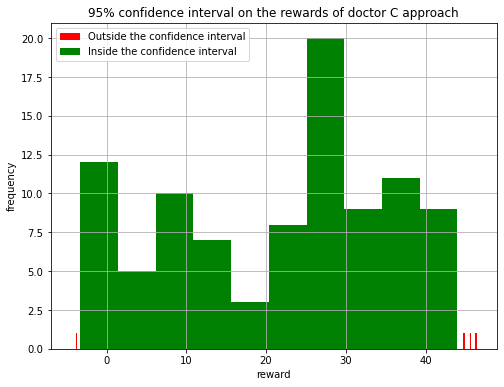

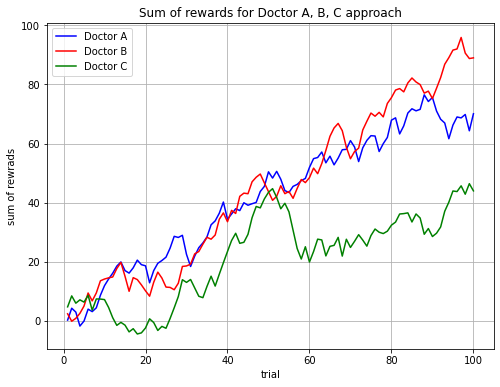

###################################### Run number 3 ###########################################


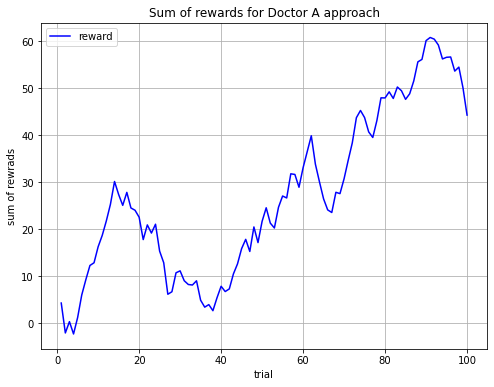

Lower bound: 0.7246543076543273
Upper bound:  59.6698697912725


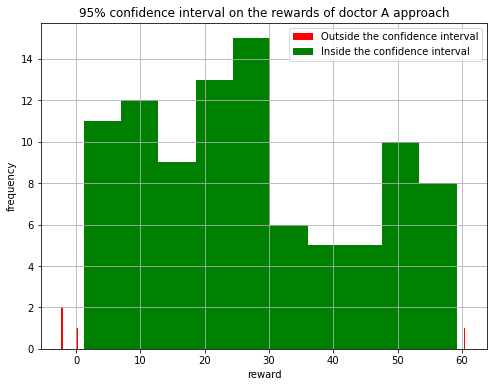

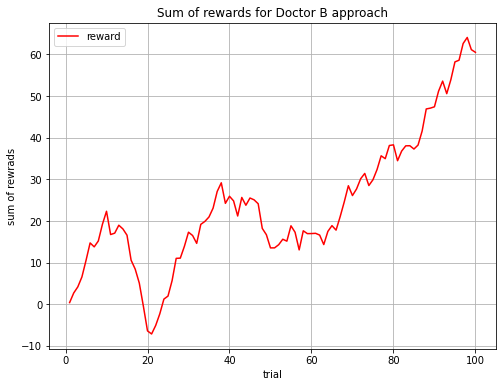

Lower bound: -3.757762999709717
Upper bound:  60.84586161185193


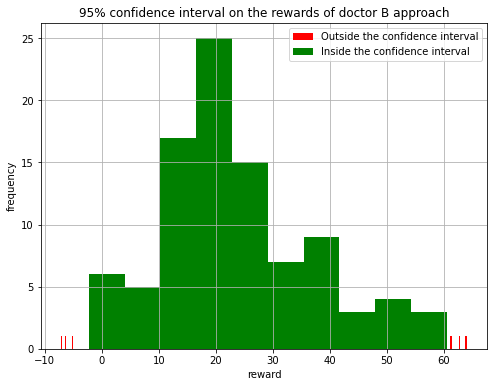

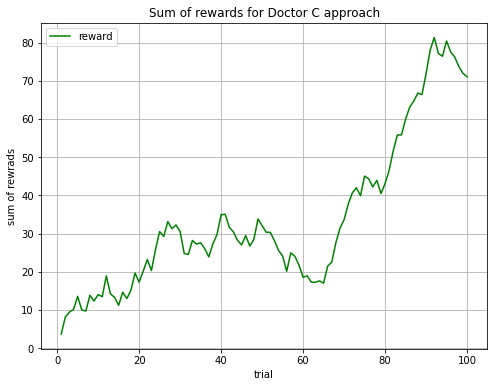

Lower bound: 9.553878257067586
Upper bound:  77.79994296355117


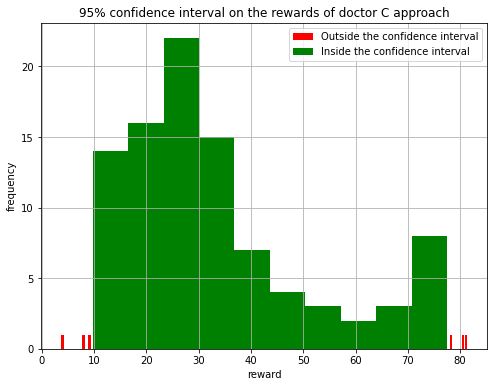

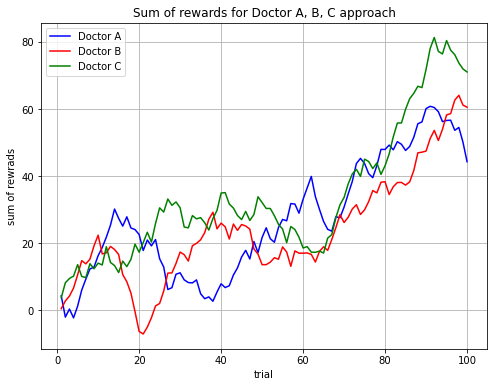

###################################### Run number 4 ###########################################


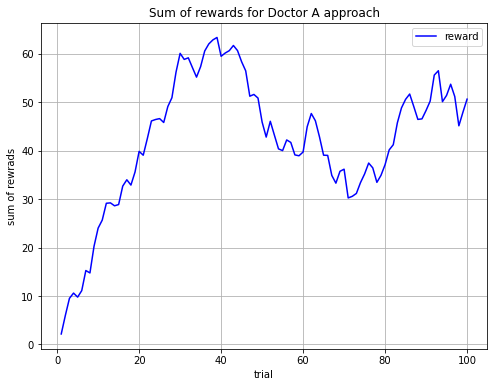

Lower bound: 9.642419872915335
Upper bound:  61.89842182124307


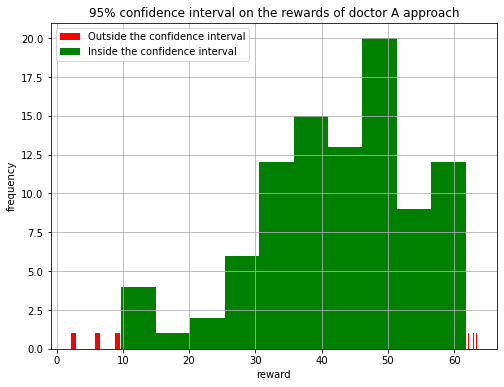

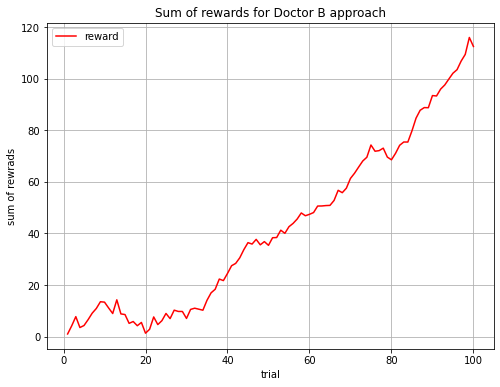

Lower bound: 3.207911651904017
Upper bound:  108.12914949644168


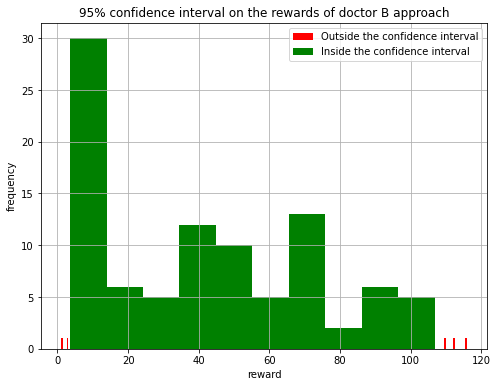

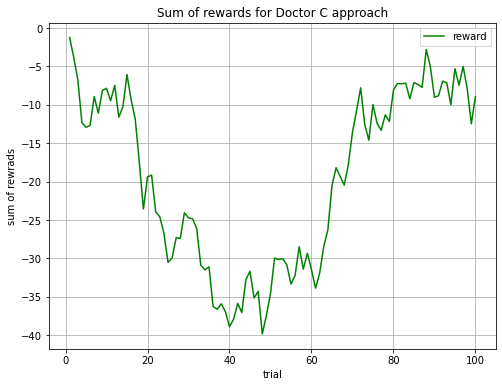

Lower bound: -37.696540167831365
Upper bound:  -4.376308832255235


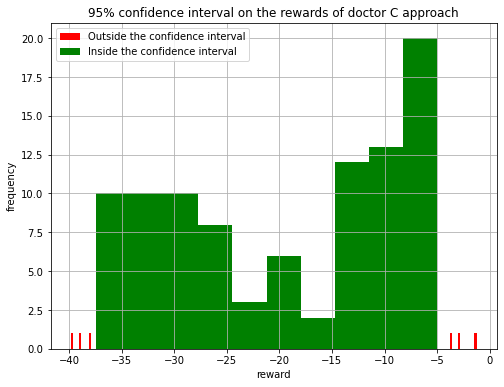

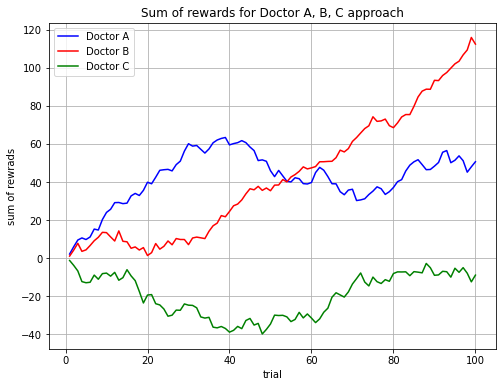

###################################### Run number 5 ###########################################


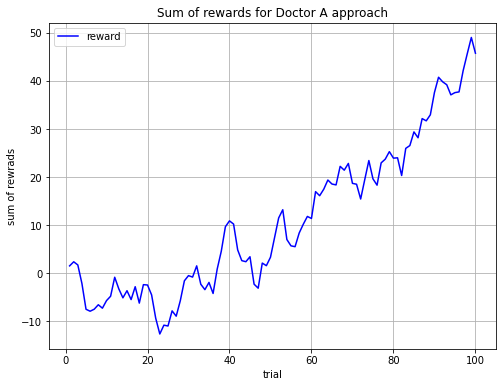

Lower bound: -10.083547177775626
Upper bound:  43.961847557599356


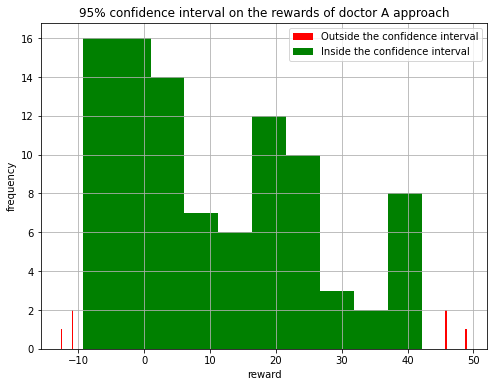

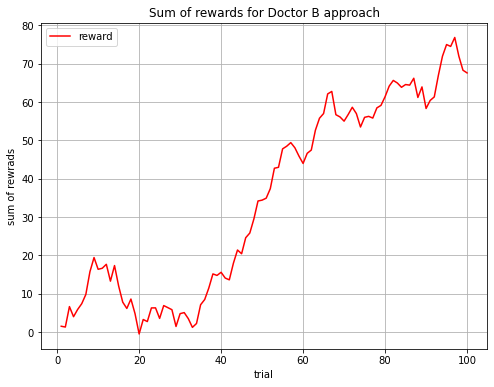

Lower bound: 1.372853889152898
Upper bound:  73.2629381051754


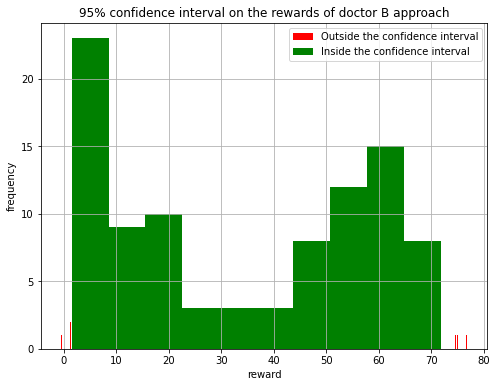

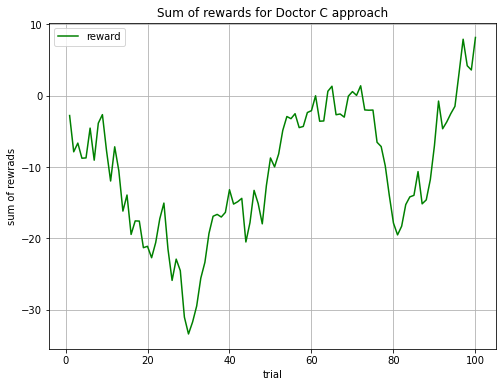

Lower bound: -30.283615233715935
Upper bound:  3.9146882461832884


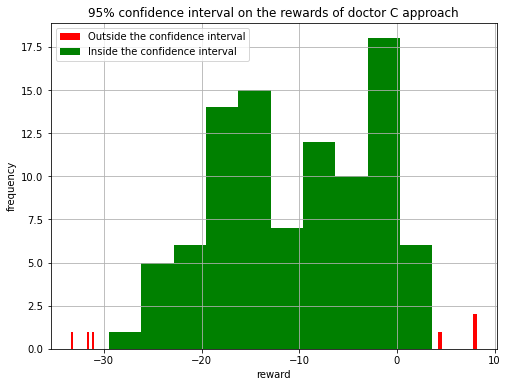

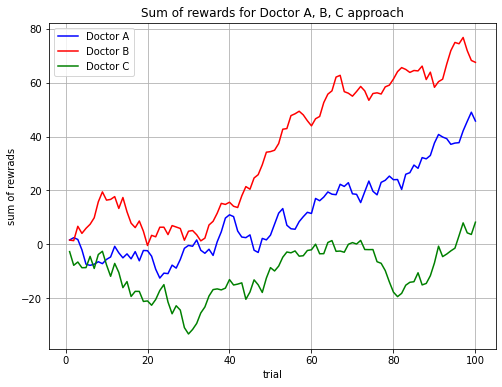

###################################### Run number 6 ###########################################


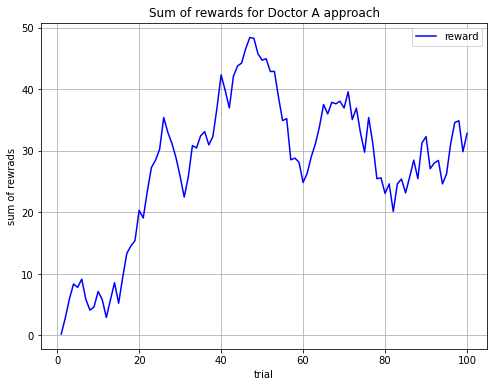

Lower bound: 3.4919635737504455
Upper bound:  46.22242439853102


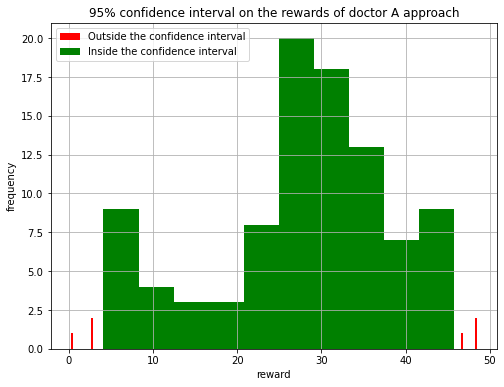

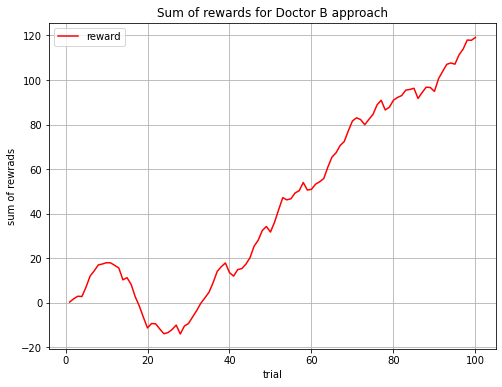

Lower bound: -12.715703928360227
Upper bound:  115.92544600290744


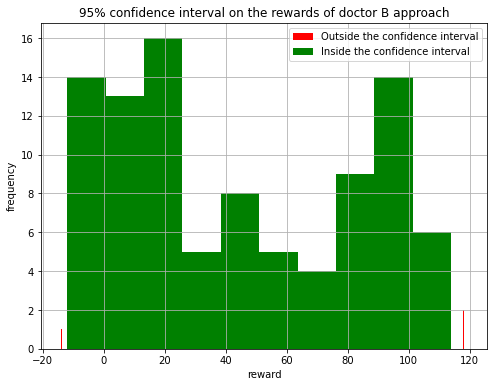

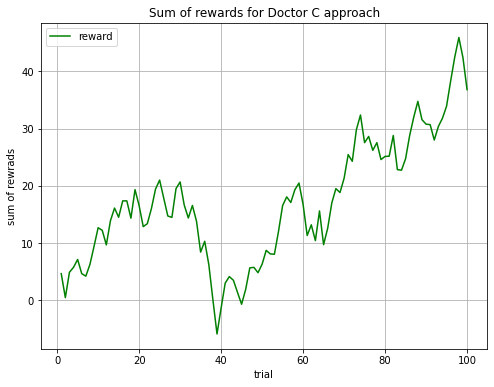

Lower bound: -0.3478994142391861
Upper bound:  40.462496525947884


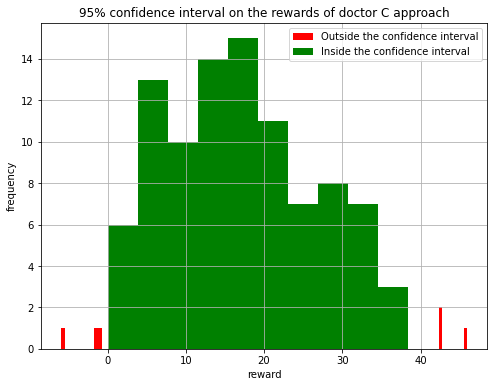

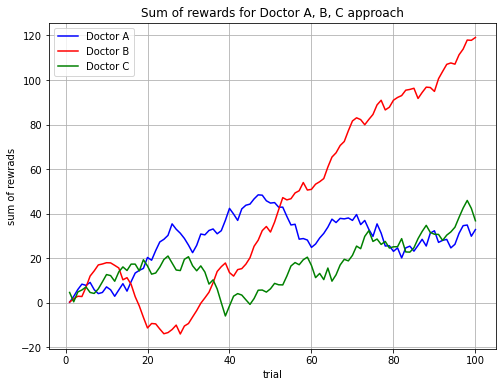

###################################### Run number 7 ###########################################


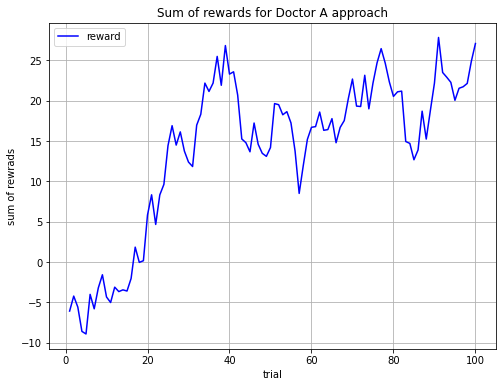

Lower bound: -5.943736443165924
Upper bound:  26.657935316286803


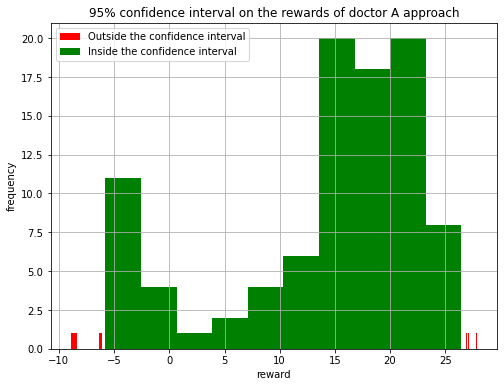

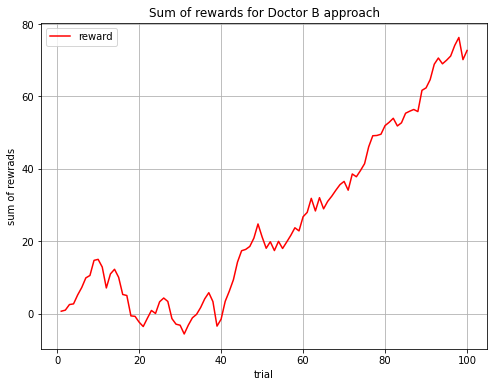

Lower bound: -3.3224430920856793
Upper bound:  71.96822382123857


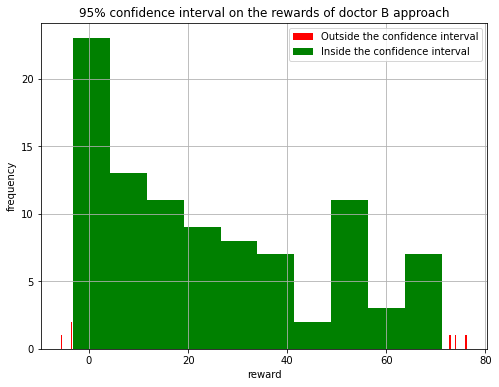

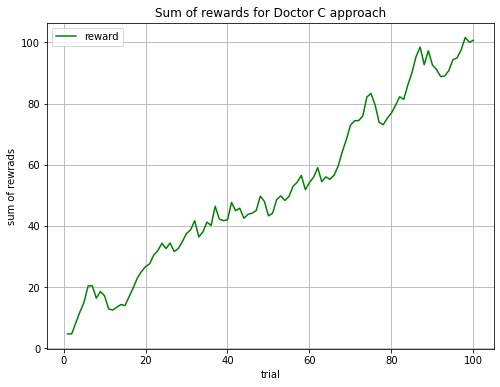

Lower bound: 9.976174218952544
Upper bound:  99.29365575206208


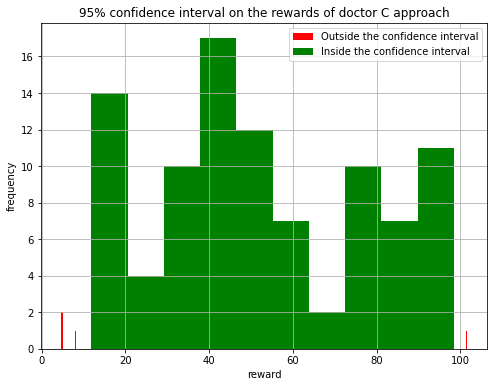

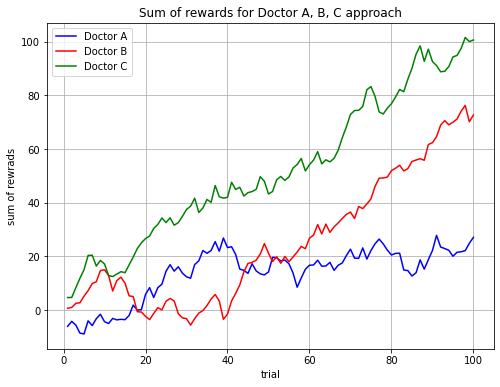

###################################### Run number 8 ###########################################


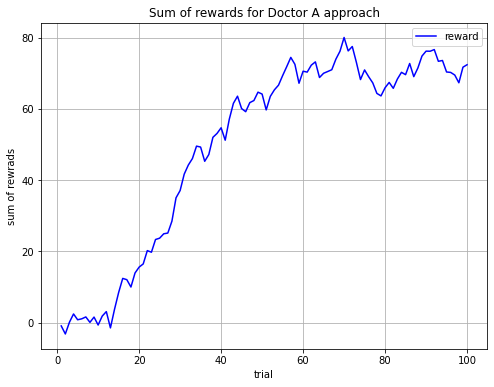

Lower bound: -0.7599372461373872
Upper bound:  76.45787862943958


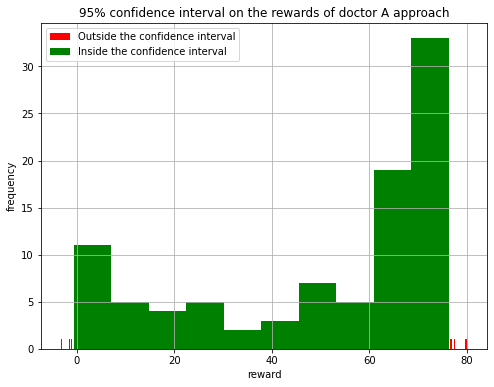

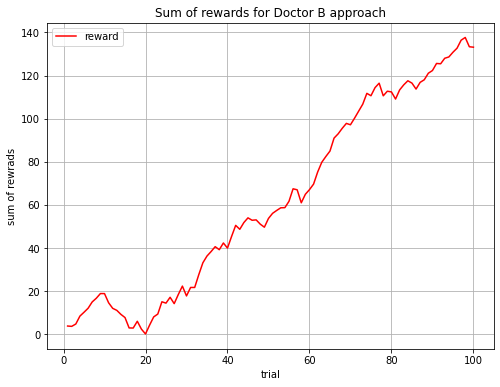

Lower bound: 2.9315607325003894
Upper bound:  133.25705299331986


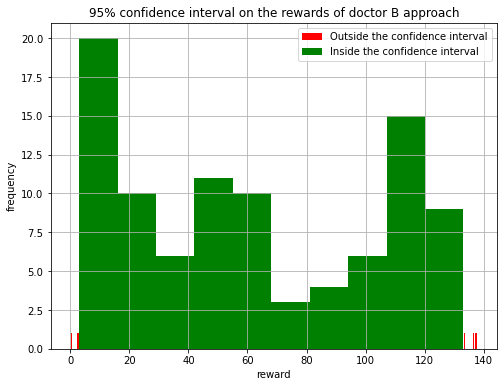

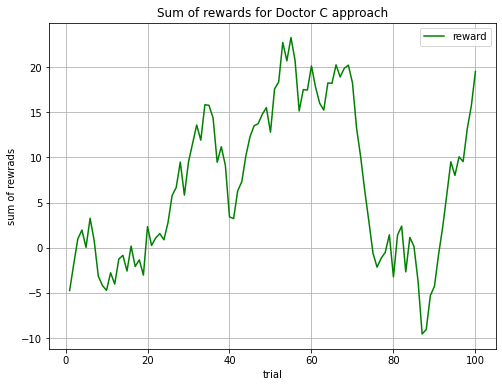

Lower bound: -5.045312300361723
Upper bound:  20.70748275514323


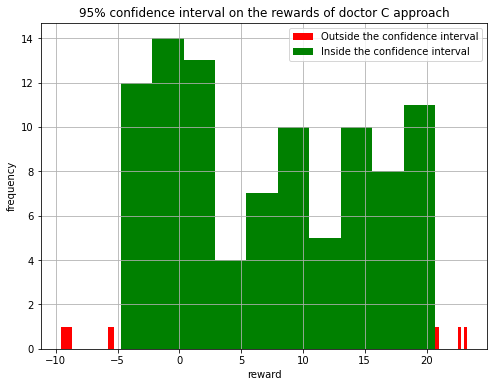

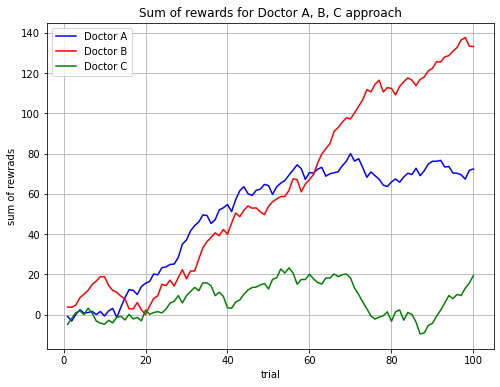

###################################### Run number 9 ###########################################


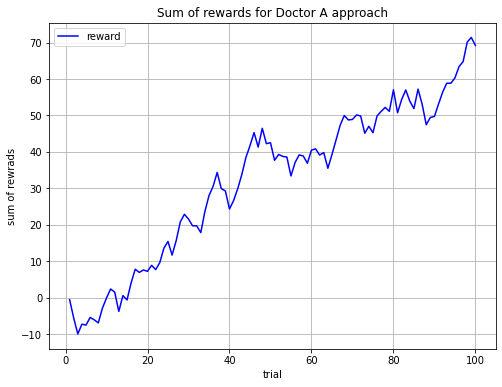

Lower bound: -7.116564445696473
Upper bound:  67.10548449645077


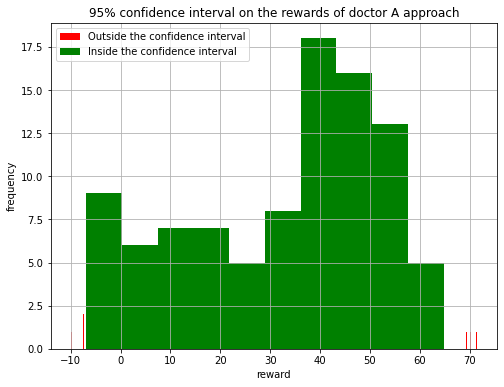

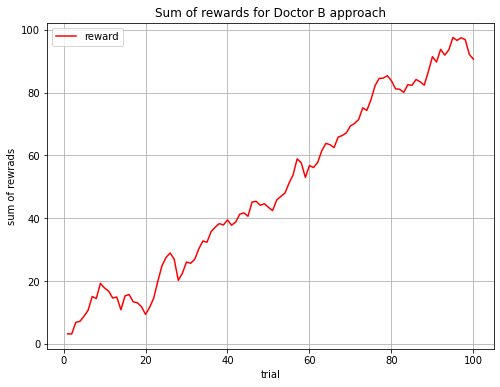

Lower bound: 6.990123600769762
Upper bound:  96.74717878739071


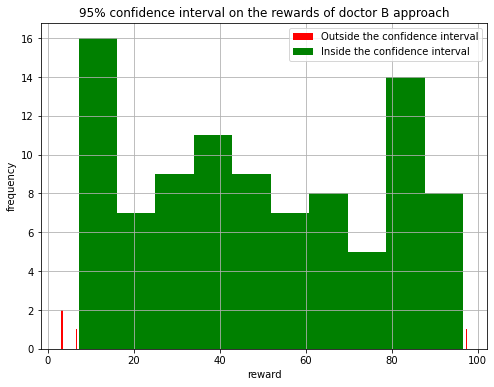

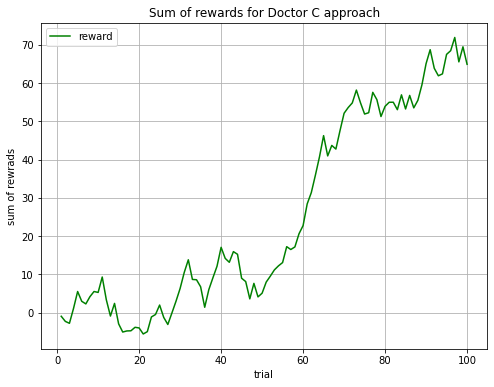

Lower bound: -4.871056229698317
Upper bound:  68.62520395587053


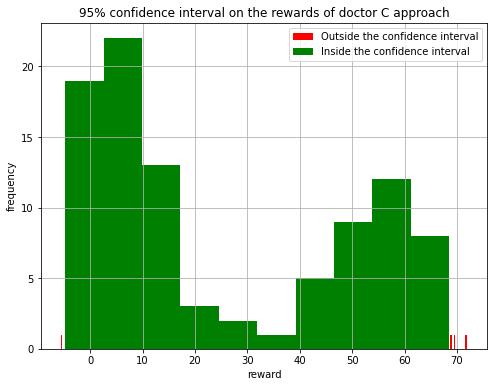

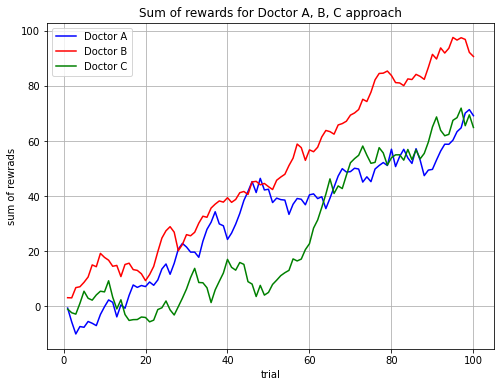

###################################### Run number 10 ###########################################


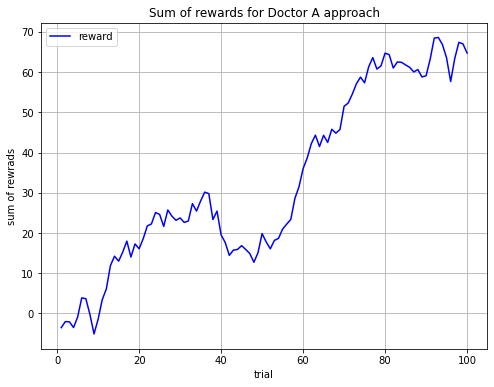

Lower bound: -2.8346367803651913
Upper bound:  67.21128076297757


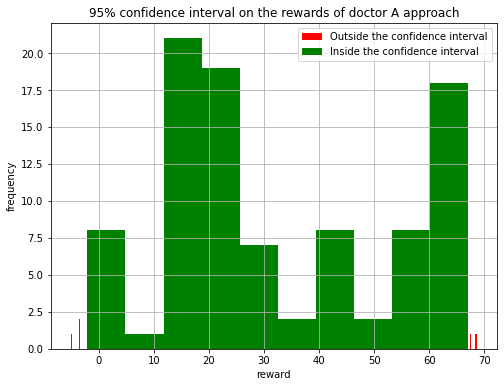

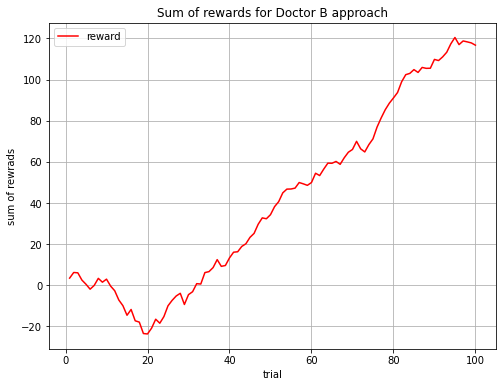

Lower bound: -19.746455434339115
Upper bound:  118.11641630616296


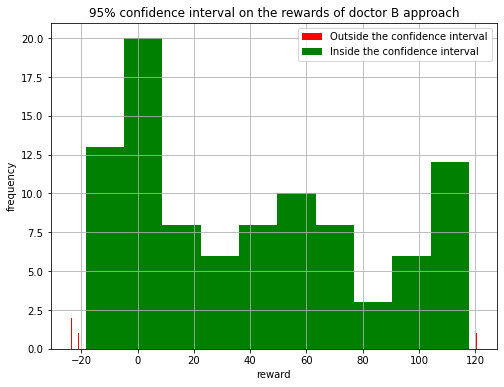

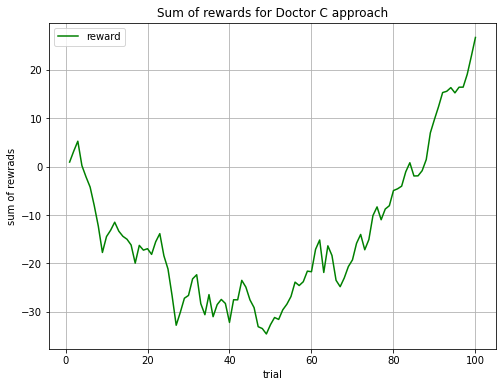

Lower bound: -32.91087118610211
Upper bound:  17.78582766701891


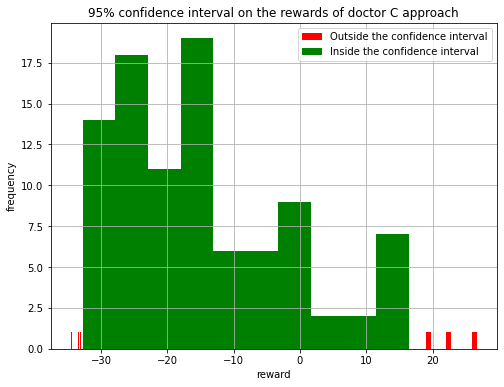

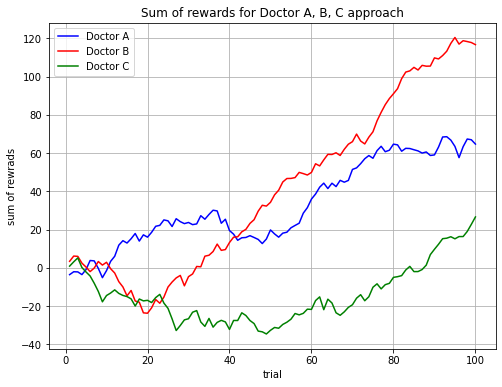

###################################### Run number 11 ###########################################


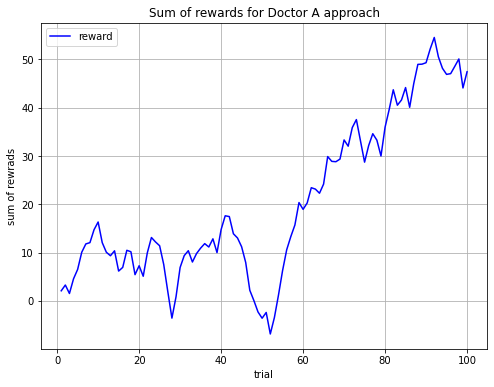

Lower bound: -3.5019824105094504
Upper bound:  50.3397253359085


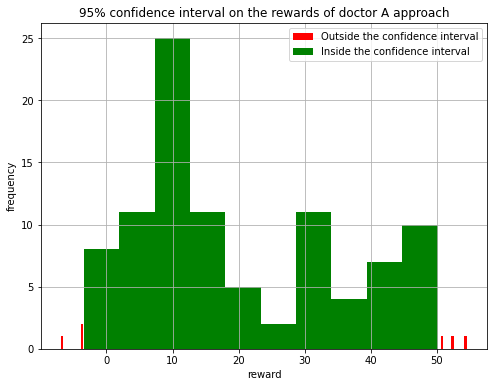

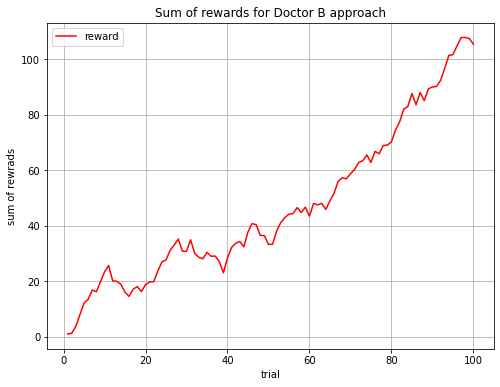

Lower bound: 5.762761821860073
Upper bound:  106.38357115767599


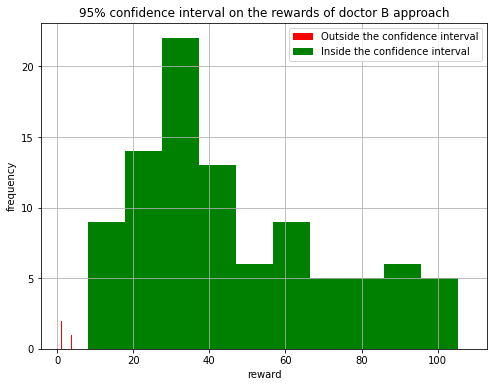

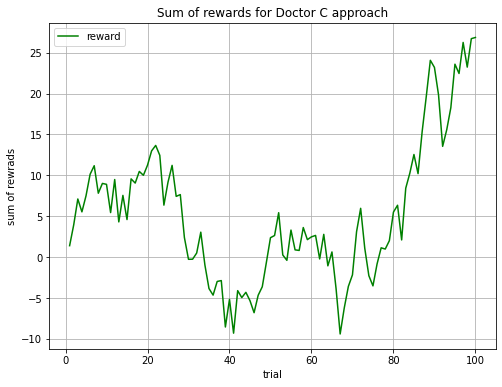

Lower bound: -7.7225787578751905
Upper bound:  25.214026398604542


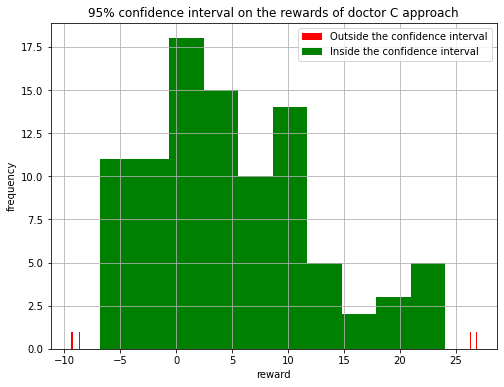

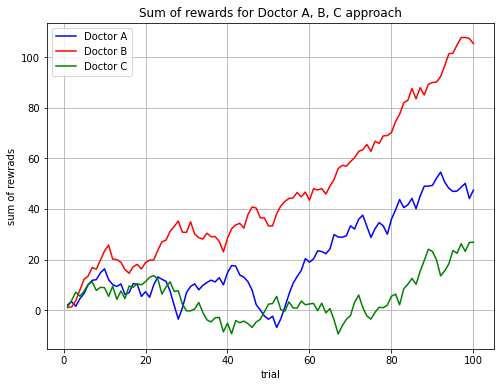

###################################### Run number 12 ###########################################


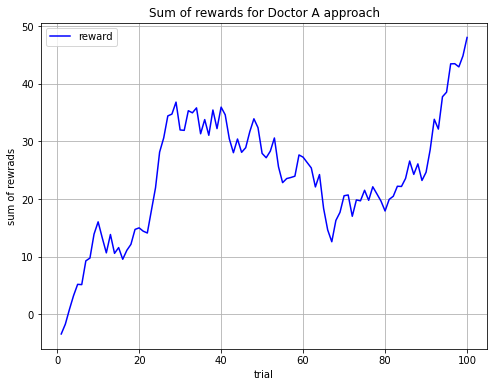

Lower bound: 2.0107876087463685
Upper bound:  43.44703959748983


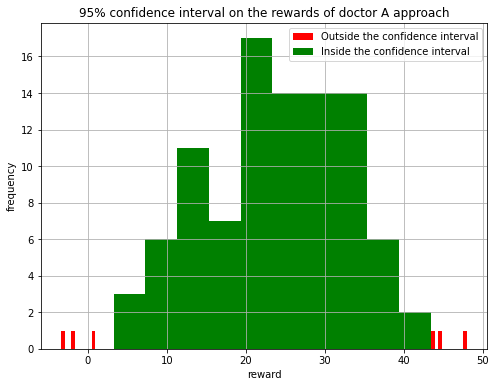

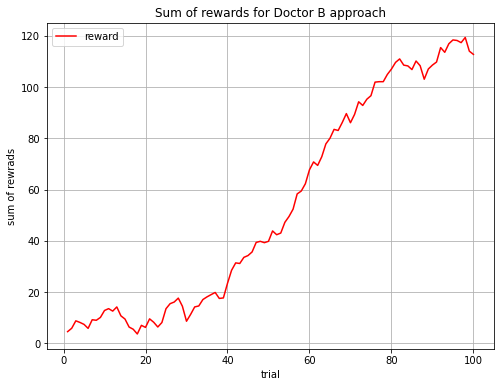

Lower bound: 5.649482386351899
Upper bound:  117.80812306201182


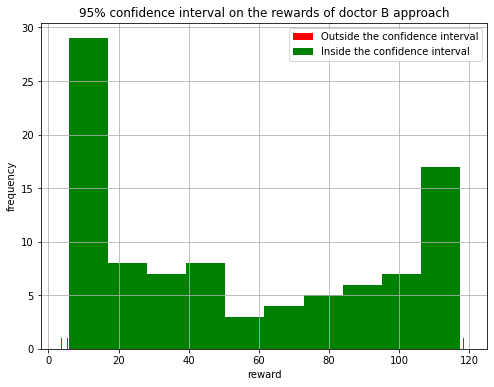

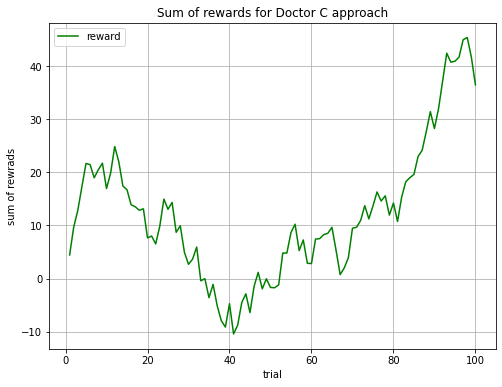

Lower bound: -8.361894089147901
Upper bound:  42.07703104576867


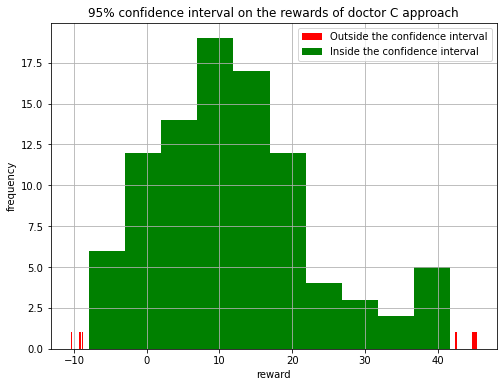

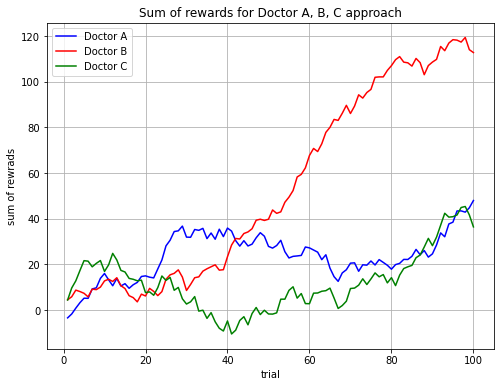

###################################### Run number 13 ###########################################


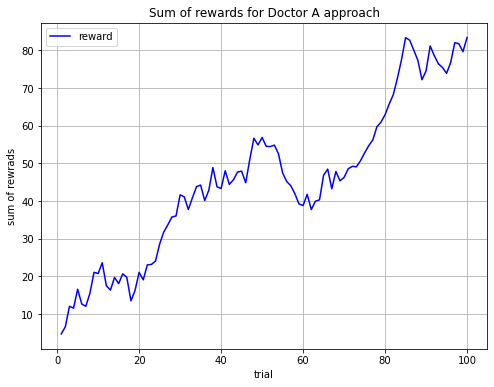

Lower bound: 11.78472131869712
Upper bound:  82.39096839115106


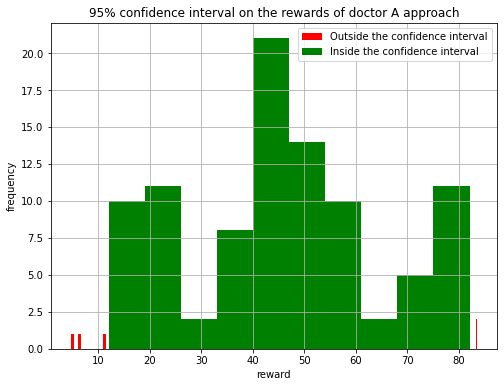

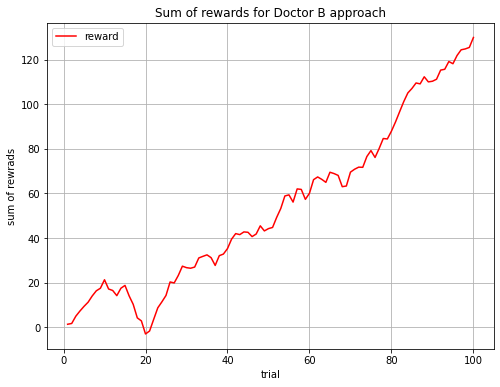

Lower bound: 1.4985719735698761
Upper bound:  124.5921637303951


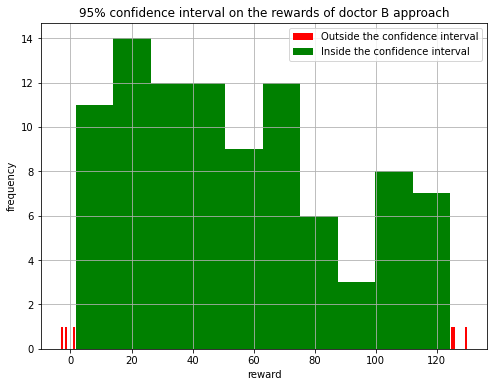

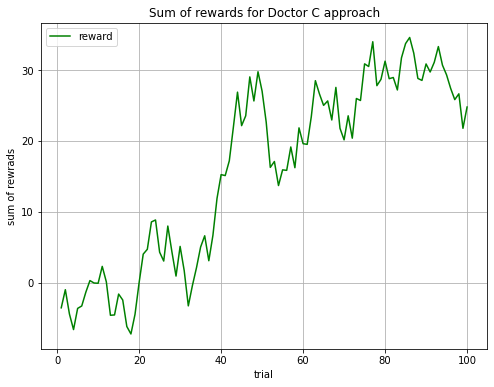

Lower bound: -5.452680078126256
Upper bound:  33.529882322132


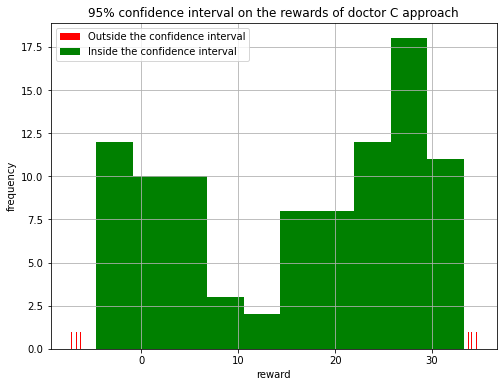

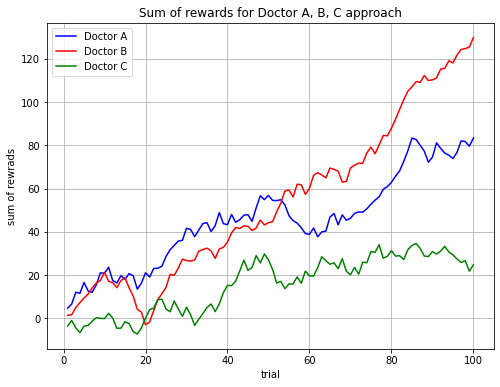

###################################### Run number 14 ###########################################


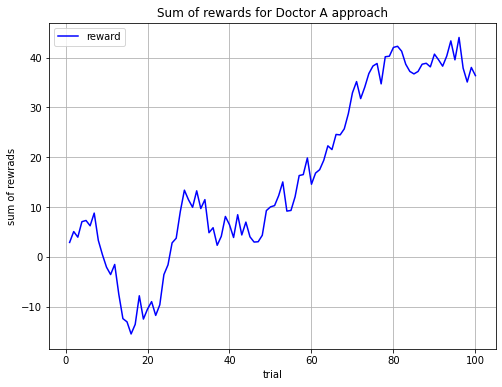

Lower bound: -12.8038650375716
Upper bound:  42.172870620438694


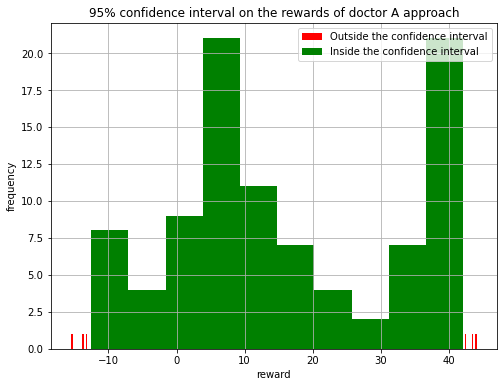

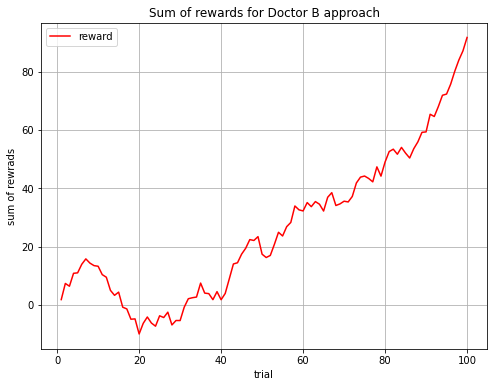

Lower bound: -6.619381085062671
Upper bound:  82.14314490974876


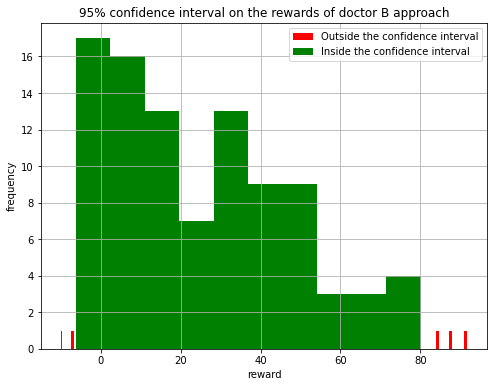

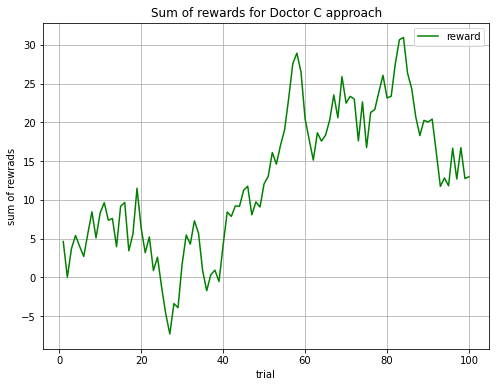

Lower bound: -3.642757554213528
Upper bound:  28.27674675014943


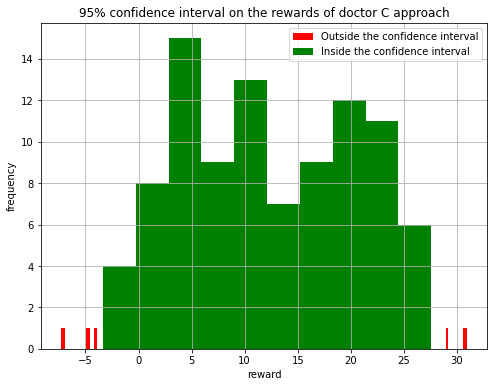

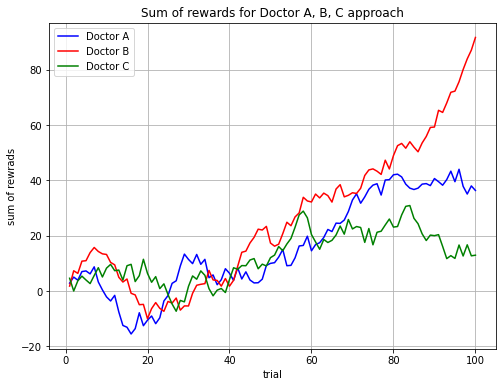

###################################### Run number 15 ###########################################


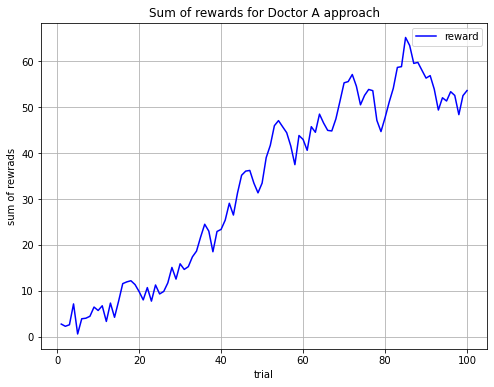

Lower bound: 2.688235033195477
Upper bound:  59.61595087941988


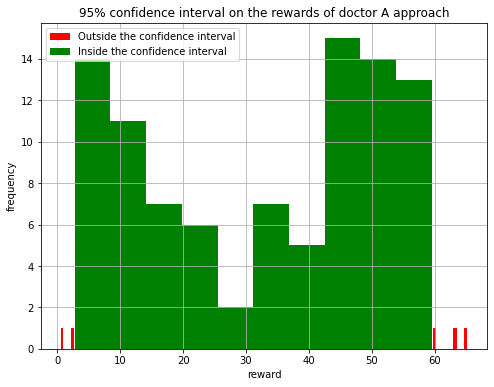

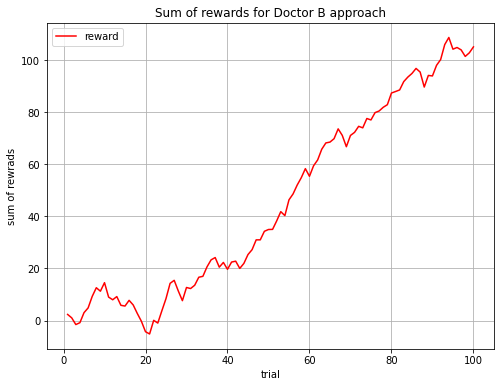

Lower bound: -1.2797515964718402
Upper bound:  104.90884538295064


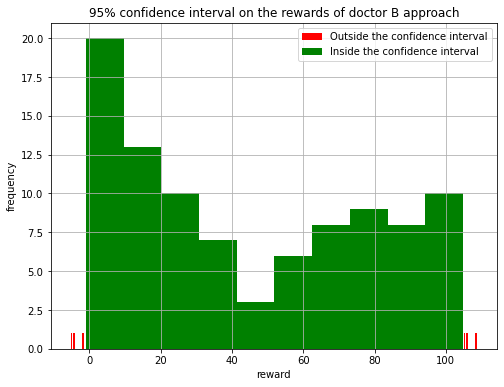

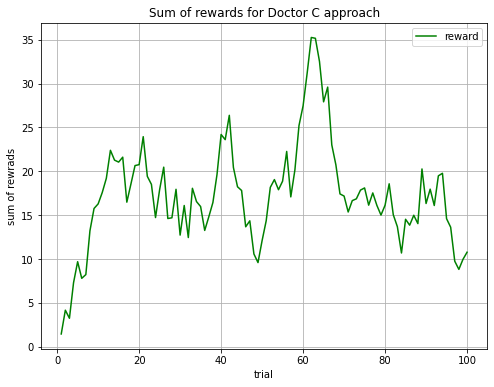

Lower bound: 5.654201553631257
Upper bound:  31.89857280906457


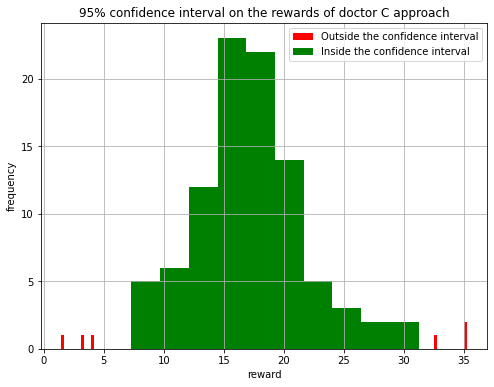

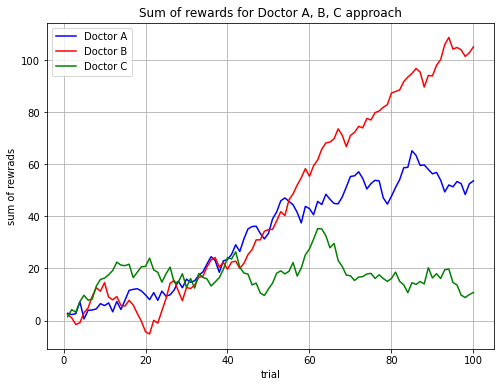

###################################### Run number 16 ###########################################


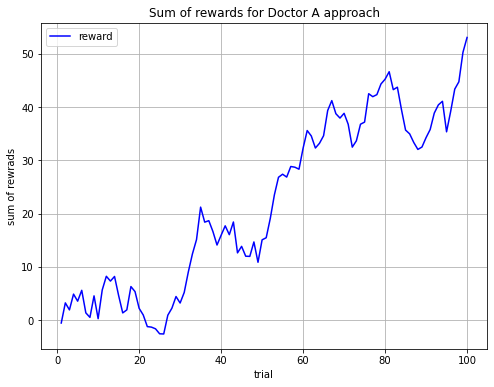

Lower bound: -1.4780193948410827
Upper bound:  45.94975558481325


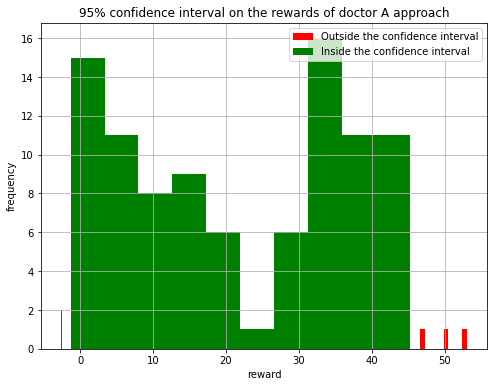

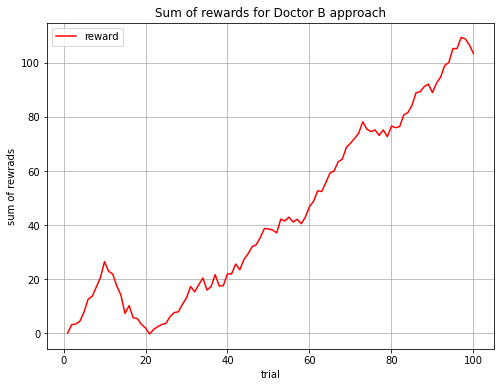

Lower bound: 1.7143882362855747
Upper bound:  105.92186822558283


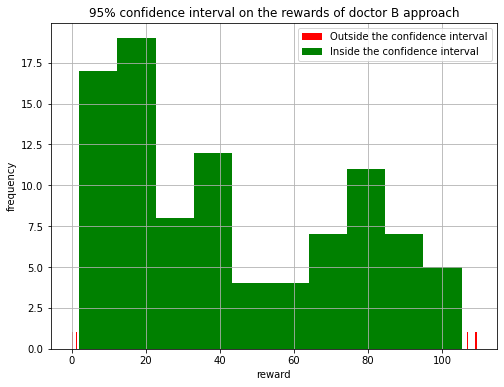

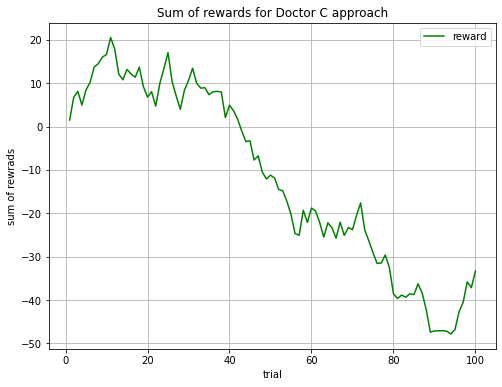

Lower bound: -47.133258565116236
Upper bound:  16.83130519833797


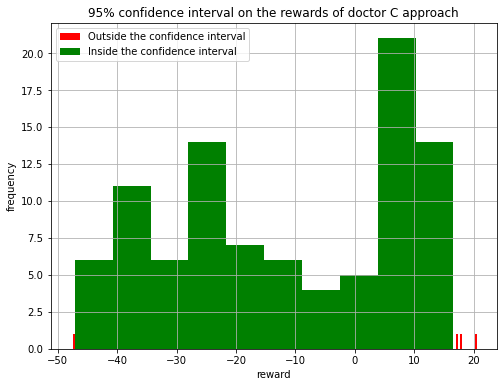

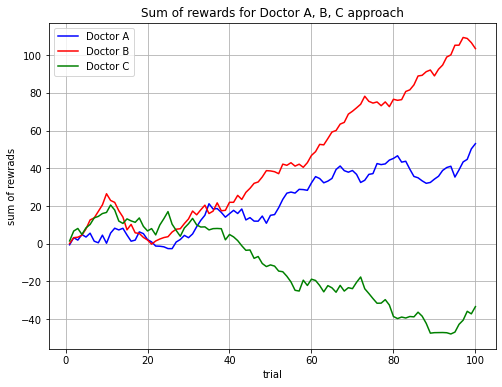

###################################### Run number 17 ###########################################


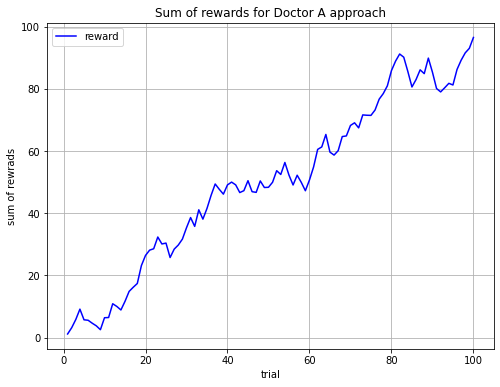

Lower bound: 3.488566782682463
Upper bound:  91.35979740592403


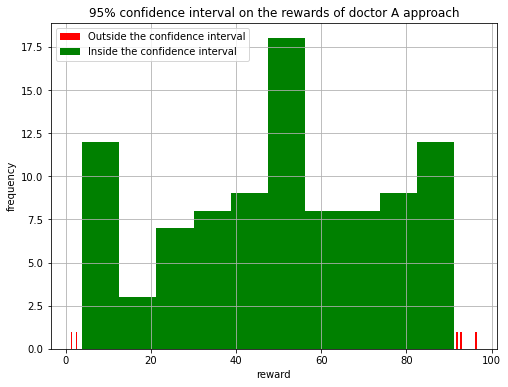

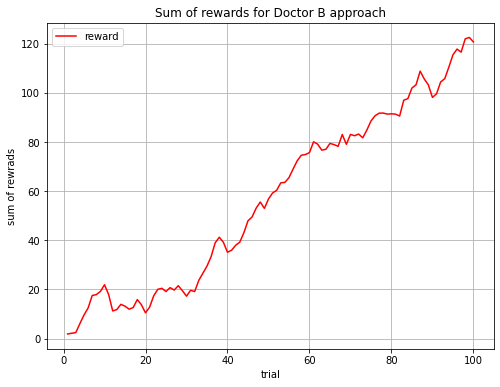

Lower bound: 4.177811648907584
Upper bound:  119.30865507106579


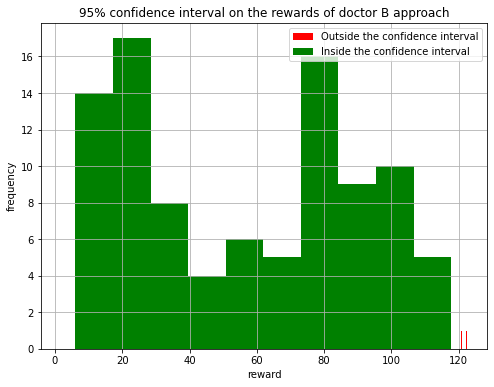

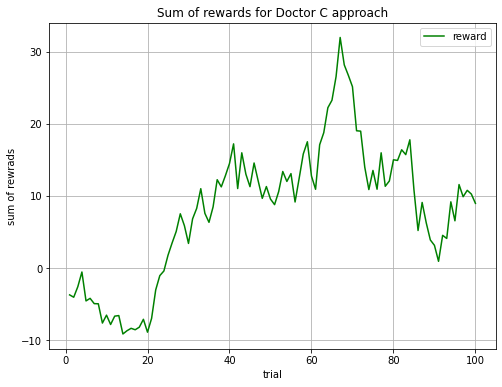

Lower bound: -8.631403285455136
Upper bound:  26.62256588187964


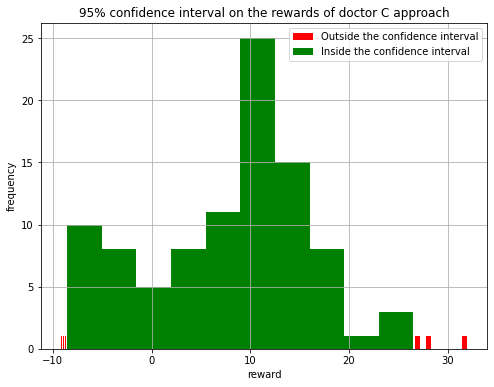

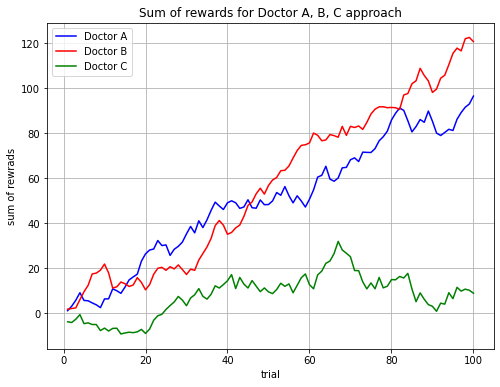

###################################### Run number 18 ###########################################


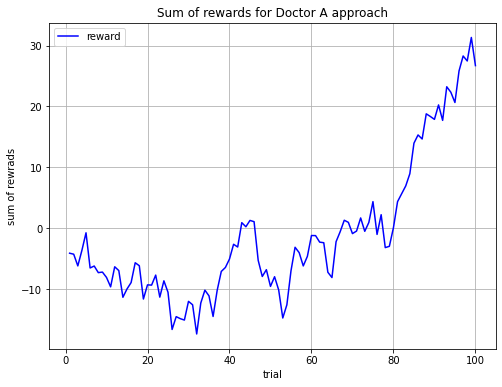

Lower bound: -14.998368843421114
Upper bound:  27.11699017724061


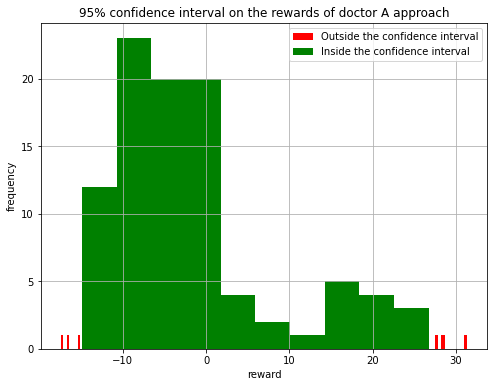

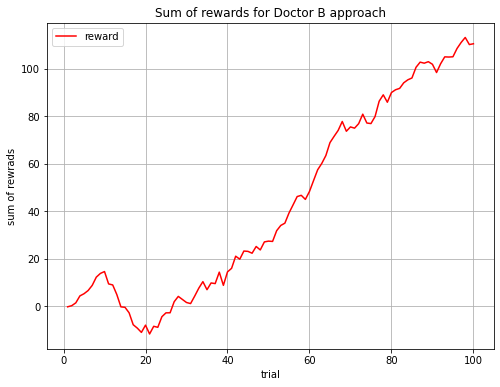

Lower bound: -8.983141315767119
Upper bound:  110.342867889456


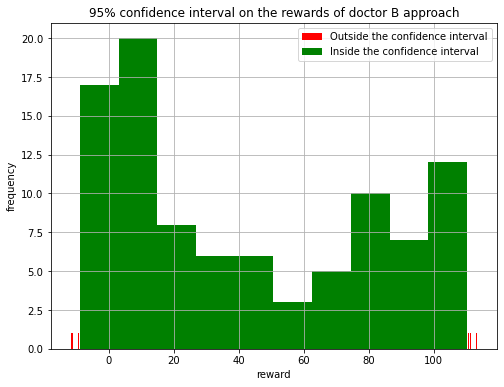

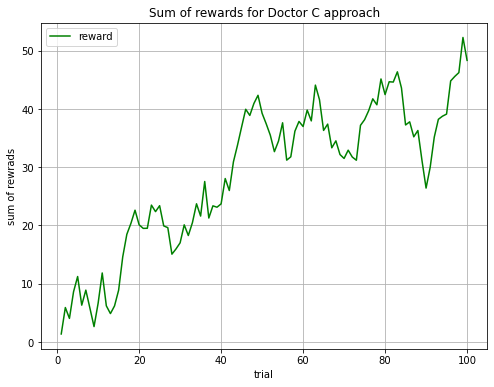

Lower bound: 4.438210735322515
Upper bound:  46.31462284726183


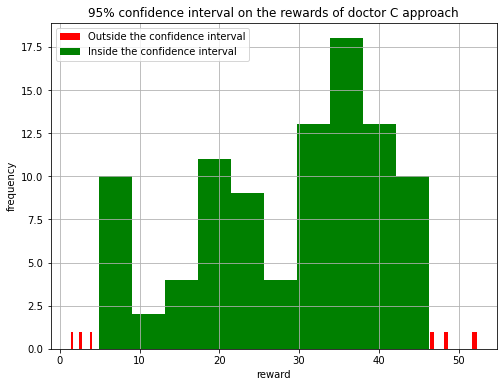

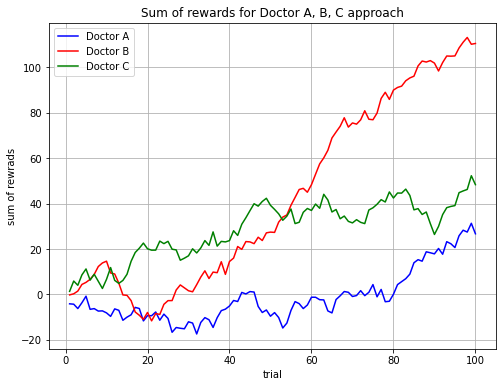

###################################### Run number 19 ###########################################


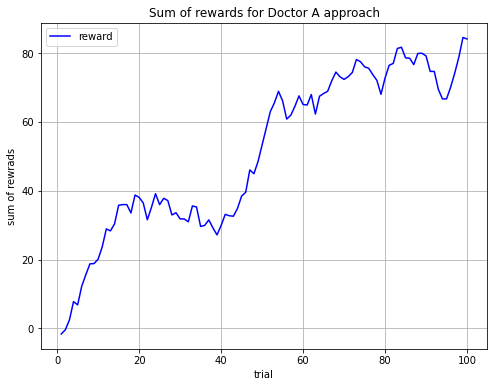

Lower bound: 4.55233186589588
Upper bound:  81.48535915375625


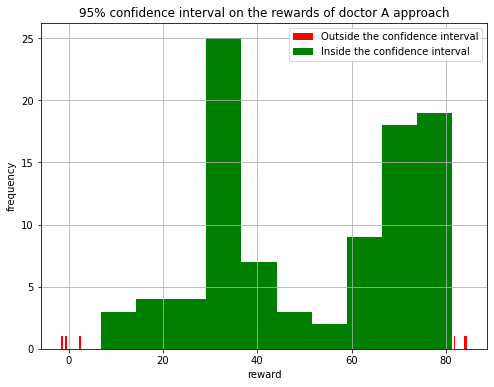

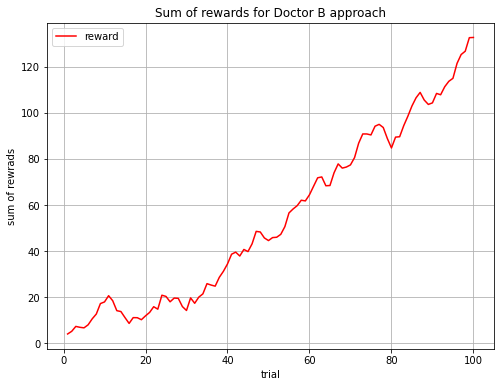

Lower bound: 6.887152603392002
Upper bound:  125.9892575948142


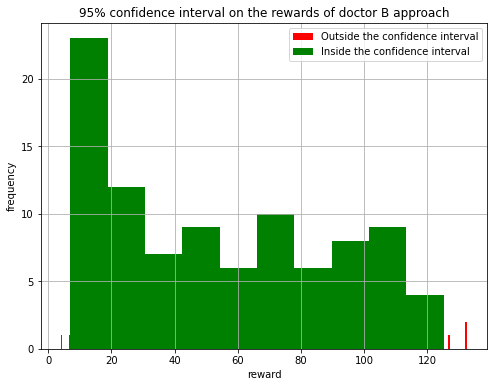

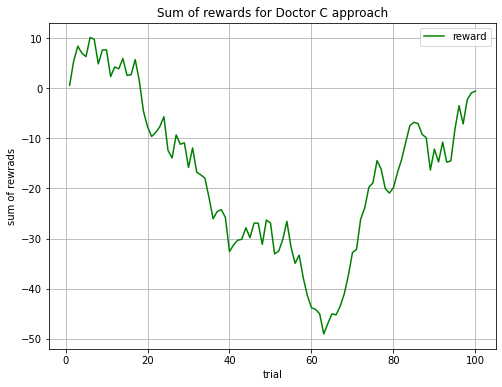

Lower bound: -45.13417885074074
Upper bound:  8.05526051803217


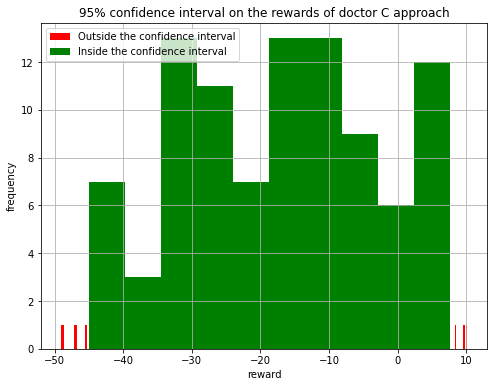

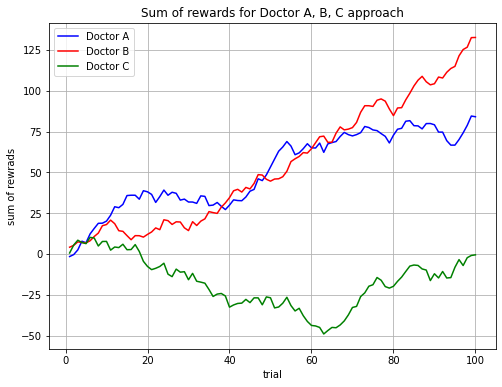

###################################### Run number 20 ###########################################


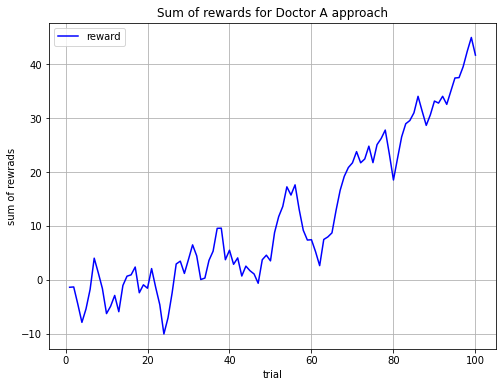

Lower bound: -6.710160273358699
Upper bound:  40.686019192853365


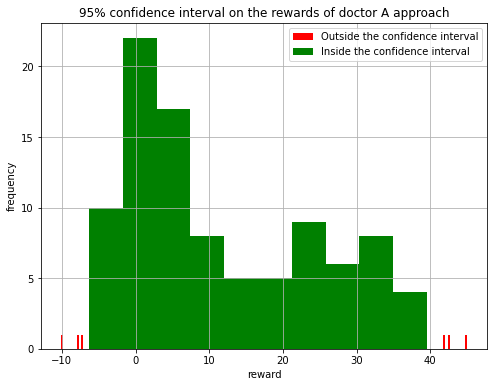

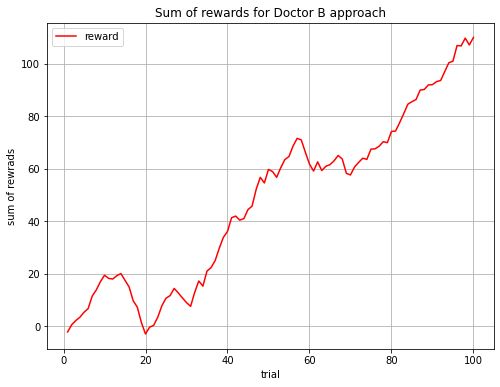

Lower bound: 0.07281945676012358
Upper bound:  107.04615283978856


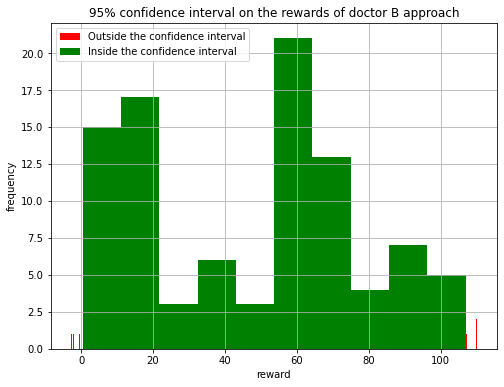

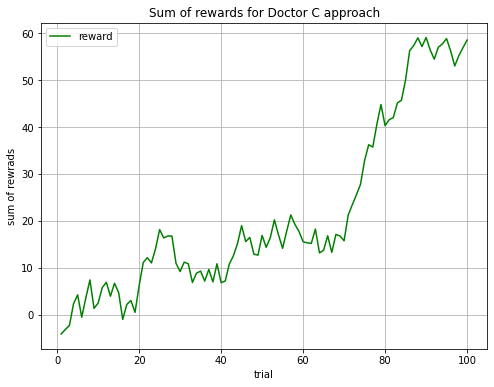

Lower bound: -1.6870711085837113
Upper bound:  58.70861678846922


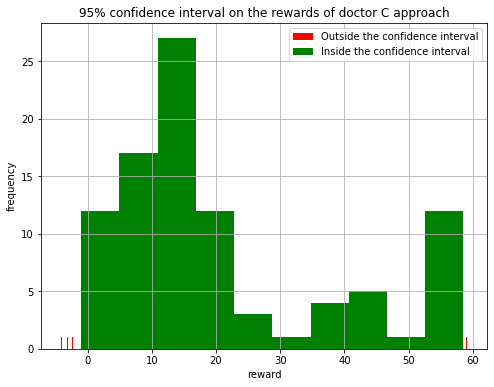

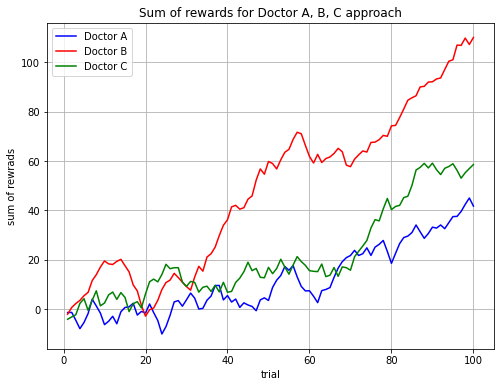

In [54]:
repeat_run_of_Q2(20)

# Question 4

In [173]:
def draw_box_plot(doctors_name, rewards):
    fig = plt.figure(figsize =(10, 7))
    plt.boxplot(rewards)
    plt.title("Box plot of doctors approach")
    plt.xlabel('doctors')
    plt.ylabel('reward')
    plt.xticks(range(1, len(doctors_name)+1), doctors_name)
    plt.grid()
    plt.show()

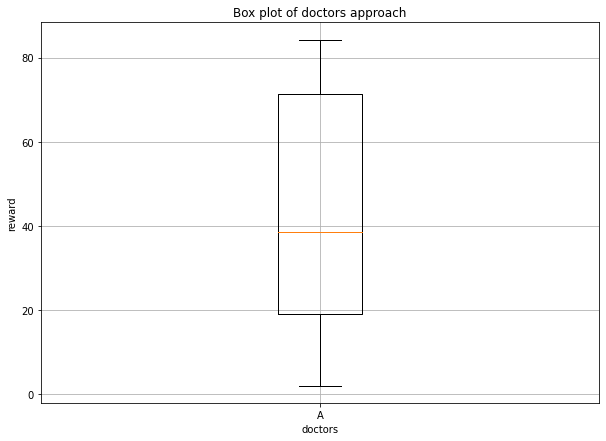

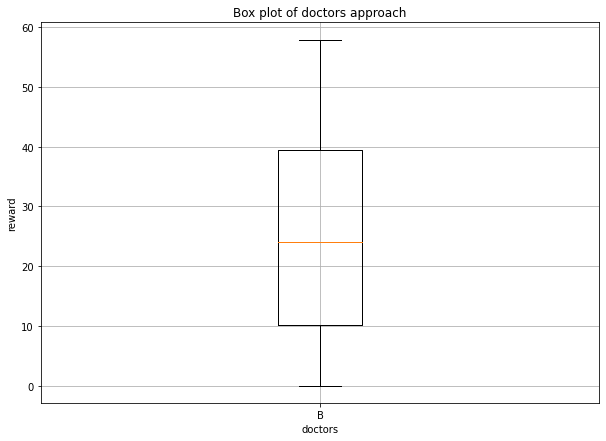

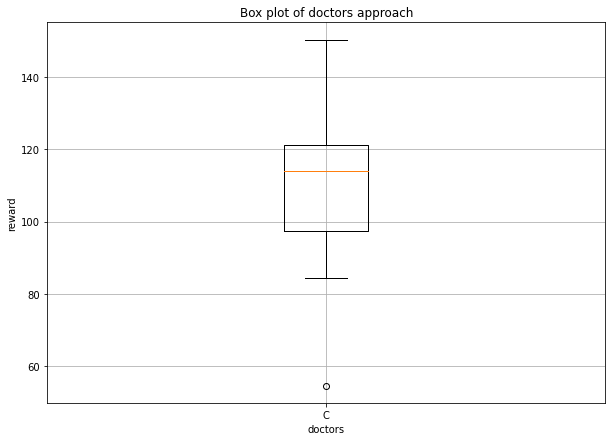

In [174]:
last_reward_a = []
for i in range(10):
    all_rewards = doctor_a_approach()
    last_reward_a.append(all_rewards[-1])
draw_box_plot(["A"], last_reward_a)
    
print("=================================================================================")
    
last_reward_b = []
for i in range(10):
    all_rewards = doctor_b_approach()
    last_reward_b.append(all_rewards[-1])
draw_box_plot(["B"], last_reward_b)
    
print("=================================================================================")
    
last_reward_c = []
for i in range(10):
    all_rewards = doctor_c_approach()
    last_reward_c.append(all_rewards[-1])
draw_box_plot(["C"], last_reward_c)

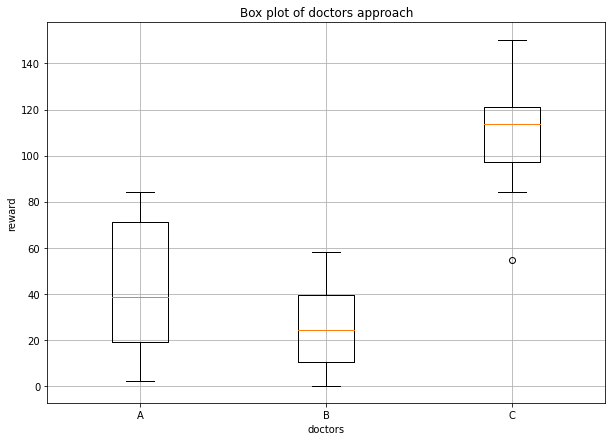

In [175]:
draw_box_plot(["A", "B", "C"], [last_reward_a, last_reward_b, last_reward_c])